Data Analysis
Research Project (Igor Malysh, Ekaterina Tyukavkina)

---
Part 1 - Analysis using regression models
---

A startup or start-up is a company or project begun by an entrepreneur to seek, develop, and validate a scalable economic model. While entrepreneurship refers to all new businesses, including self-employment and businesses that never intend to become registered, startups refer to new businesses that intend to grow large beyond the solo founder. Startups face high uncertainty and have high rates of failure, but a minority of them do go on to be successful and influential. Some startups become unicorns: privately held startup companies valued at over US$1 billion.

In [695]:
import pandas as pd

In [696]:
df = pd.read_csv('startup_data.csv')
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


**Research Goal** is to develop a predictive model that accurately classifies startup success (acquired) versus failure (closed) based on investment patterns, funding history, industry characteristics, and operational milestones, enabling stakeholders to make data-driven decisions regarding startup viability.

**Research Objectives**

1. Data Understanding – Explore relationships between startup success/failure and features such as funding, industry type, and geographical location.

2. Feature Engineering – Derive meaningful predictors from existing variables (e.g., funding intervals, milestone achievement rates).

3. Model Development – Build and compare classification models (e.g., logistic regression, random forest, gradient boosting) to predict startup outcomes.

4. Model Evaluation – Assess model performance using metrics like accuracy, precision, recall, F1-score, and AUC-ROC.

5. Actionable Insights – Identify key factors influencing startup success to guide investors, founders, and policymakers.

**Research Hypotheses**

Funding Amount Hypothesis

- H0: There is no relationship between total funding amount (USD) and startup success.

- H1: Startups with higher total funding amounts are more likely to succeed than those with lower funding.

Milestone Hypothesis

- H0: The number of milestones achieved does not affect startup success.

- H1: Startups achieving more milestones have a higher probability of success.

Geographical Hypothesis

- H0: Location in major startup hubs (CA, NY, MA, TX) does not influence startup success.

- H1: Startups based in major startup hubs are more likely to succeed than those in other locations.

Investment Stage Hypothesis

- H0: Securing later-stage funding (Round C/D) does not affect startup success.

- H1: Startups securing later-stage funding are more likely to succeed than those limited to early-stage funding.

Industry Hypothesis

- H0: Industry sector does not influence startup success rates.

- H1: Startups in technology-driven sectors (software, biotech, web/mobile) have higher success rates than those in traditional industries.

Investor Type Hypothesis

- H0: Venture capital backing does not influence startup success.

- H1: Startups backed by venture capital (has_VC = 1) are more likely to succeed than those without VC involvement.

Top 500 Hypothesis

- H0: Being listed as "top 500" does not affect startup success.

- H1: Startups listed as "top 500" are more likely to succeed than those not listed.

Funding Speed Hypothesis

- H0: The time between founding and first funding does not affect startup success.

- H1: Startups with shorter intervals between founding and first funding are more likely to succeed.

Network Hypothesis

- H0: The number of relationships does not influence startup success.

- H1: Startups with more relationships (partners, investors, clients) have higher success rates.

Operational Longevity Hypothesis

- H0: The time to first milestone does not affect startup success.

- H1: Startups that achieve their first milestone sooner after founding are more likely to succeed.

In [697]:
# Basic data information
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1]}")
print(f"Number of observations: {df.shape[0]}")
print(f"\nData types:\n{df.dtypes.value_counts()}")
print(f"\nMissing values:\n{df.isnull().sum().sort_values(ascending=False).head(10)}")

Dataset shape: (923, 49)
Number of features: 49
Number of observations: 923

Data types:
int64      28
object     14
float64     7
Name: count, dtype: int64

Missing values:
closed_at                   588
Unnamed: 6                  493
age_first_milestone_year    152
age_last_milestone_year     152
state_code.1                  1
zip_code                      0
id                            0
Unnamed: 0                    0
state_code                    0
name                          0
dtype: int64


In [698]:
# Target variable distribution
status_counts = df['status'].value_counts()
status_percentage = df['status'].value_counts(normalize=True) * 100

print("Startup Status Distribution:")
print(f"Success (acquired): {status_counts.get('acquired', 0)} ({status_percentage.get('acquired', 0):.2f}%)")
print(f"Failure (closed): {status_counts.get('closed', 0)} ({status_percentage.get('closed', 0):.2f}%)")
print(f"Class ratio (acquired:closed): {status_counts.get('acquired', 1)/status_counts.get('closed', 1):.2f}:1")

Startup Status Distribution:
Success (acquired): 597 (64.68%)
Failure (closed): 326 (35.32%)
Class ratio (acquired:closed): 1.83:1


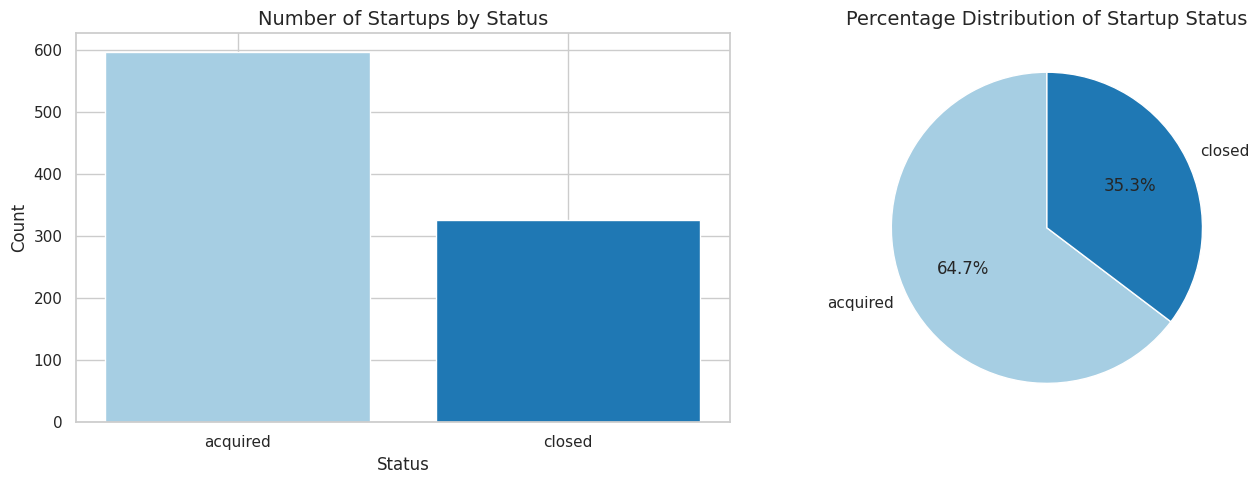

In [699]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Get colors from the palette
colors = sns.color_palette("Paired")

status_counts = df['status'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot - using colors from palette
axes[0].bar(status_counts.index, status_counts.values, color=colors)
axes[0].set_title('Number of Startups by Status', fontsize=14)
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Status')

# Pie chart - using colors from palette
axes[1].pie(status_counts.values, labels=status_counts.index, 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Percentage Distribution of Startup Status', fontsize=14)

plt.tight_layout()
plt.show()

In [700]:
categorical_vars = [
    'state_code', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
    'category_code', 'is_top500',
    'has_VC', 'has_angel',
    'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD'
]

print("Frequency Analysis of Categorical Variables:")
for var in categorical_vars[:6]:  # Analyze first 6 in detail
    print(f"\n--- {var} ---")
    freq_table = df[var].value_counts()
    print(freq_table)
    
    # Success rate by category
    if var != 'state_code.1':  # Avoid duplicate
        for category in freq_table.index[:5]:  # Top 5 categories
            subset = df[df[var] == category]
            success_rate = (subset['status'] == 'acquired').mean() * 100
            print(f"{category}: {success_rate:.2f}% success rate")

# Success rates for binary categorical variables
binary_vars = ['has_VC', 'has_angel', 'is_top500', 
               'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']

print("\nSuccess Rates for Binary Variables:")
for var in binary_vars:
    success_rate_1 = df[df[var] == 1]['status'].apply(lambda x: 1 if x == 'acquired' else 0).mean() * 100
    success_rate_0 = df[df[var] == 0]['status'].apply(lambda x: 1 if x == 'acquired' else 0).mean() * 100
    print(f"{var}: 1 = {success_rate_1:.2f}%, 0 = {success_rate_0:.2f}%")

Frequency Analysis of Categorical Variables:

--- state_code ---
state_code
CA    488
NY    106
MA     83
WA     42
TX     42
CO     19
IL     18
PA     17
VA     13
GA     11
NC      7
OR      7
NJ      7
MD      7
FL      6
OH      6
MN      5
CT      4
DC      4
UT      3
TN      3
RI      3
MI      3
KY      2
ME      2
NH      2
MO      2
IN      2
NV      2
AZ      2
WV      1
NM      1
ID      1
AR      1
WI      1
Name: count, dtype: int64
CA: 68.03% success rate
NY: 72.64% success rate
MA: 77.11% success rate
WA: 57.14% success rate
TX: 54.76% success rate

--- is_CA ---
is_CA
1    487
0    436
Name: count, dtype: int64
1: 68.17% success rate
0: 60.78% success rate

--- is_NY ---
is_NY
0    817
1    106
Name: count, dtype: int64
0: 63.65% success rate
1: 72.64% success rate

--- is_MA ---
is_MA
0    840
1     83
Name: count, dtype: int64
0: 63.45% success rate
1: 77.11% success rate

--- is_TX ---
is_TX
0    881
1     42
Name: count, dtype: int64
0: 65.15% success rate
1: 54.7

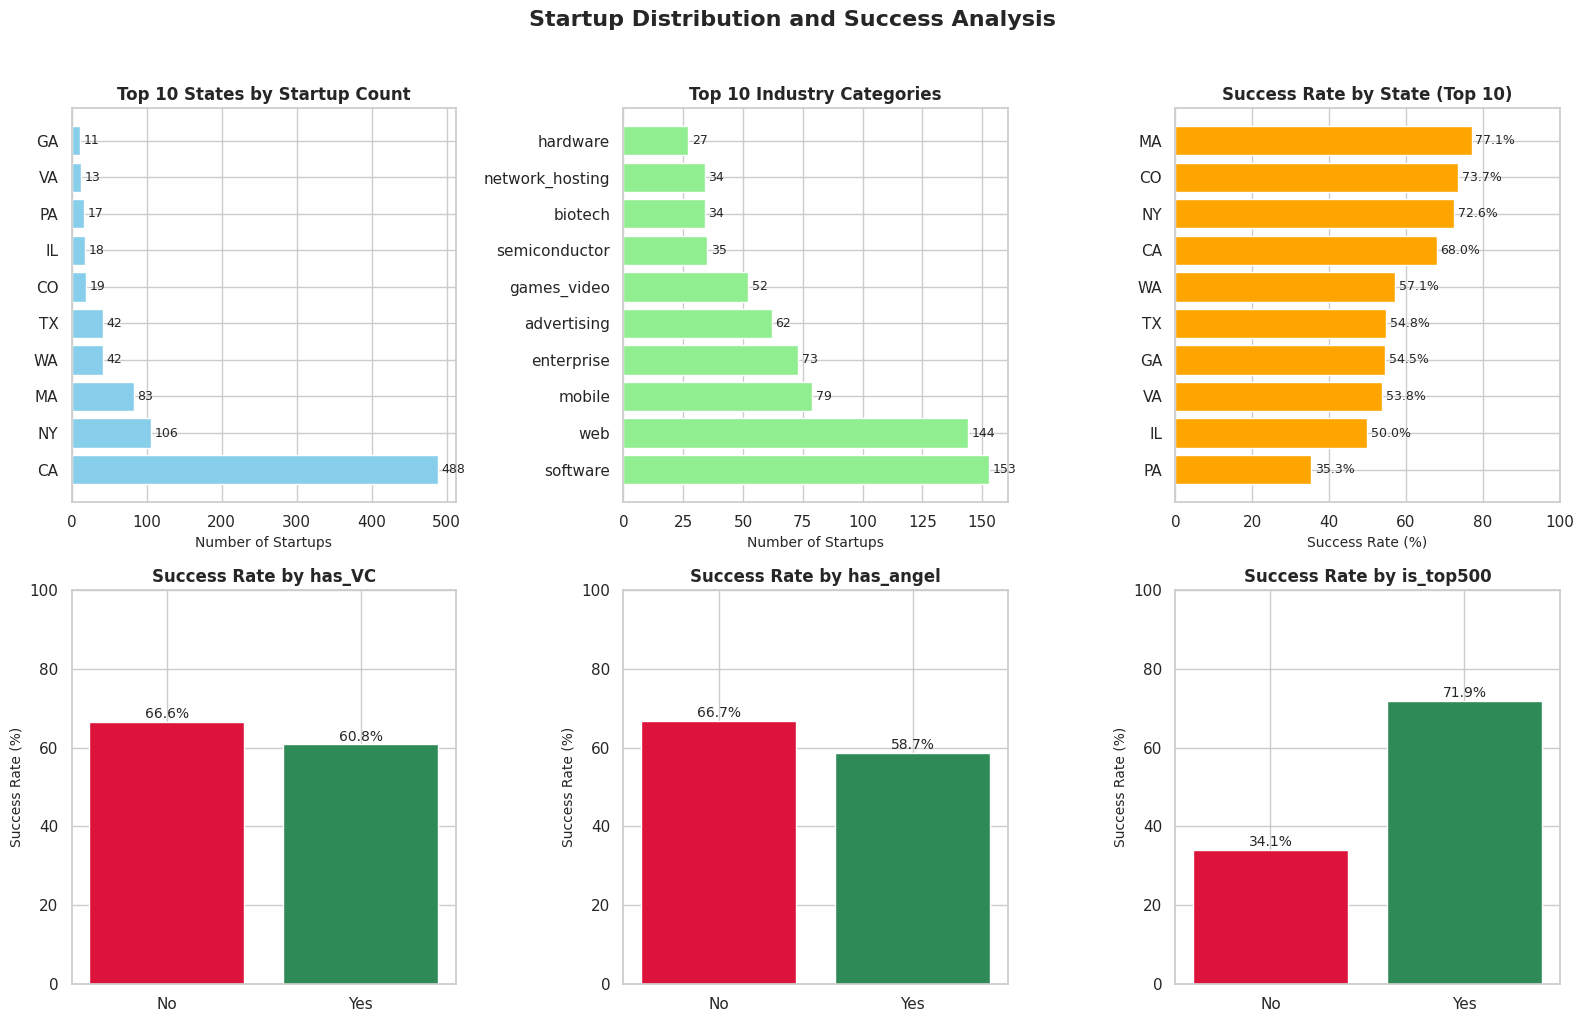

In [701]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))  # 2 rows, 3 columns

# Row 1: Three plots
# 1. State distribution (row 0, col 0)
state_counts = df['state_code'].value_counts().head(10)
axes[0, 0].barh(state_counts.index, state_counts.values, color='skyblue')
axes[0, 0].set_title('Top 10 States by Startup Count', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Startups', fontsize=10)

# Add value labels on bars
for i, (state, count) in enumerate(zip(state_counts.index, state_counts.values)):
    axes[0, 0].text(count + max(state_counts.values)*0.01, i, 
                   f'{count:,}', va='center', fontsize=9)

# 2. Industry category distribution (row 0, col 1)
category_counts = df['category_code'].value_counts().head(10)
axes[0, 1].barh(category_counts.index, category_counts.values, color='lightgreen')
axes[0, 1].set_title('Top 10 Industry Categories', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Startups', fontsize=10)

# Add value labels on bars
for i, (category, count) in enumerate(zip(category_counts.index, category_counts.values)):
    axes[0, 1].text(count + max(category_counts.values)*0.01, i, 
                   f'{count:,}', va='center', fontsize=9)

# 3. Success rate by state (top 10) (row 0, col 2)
top_states = df['state_code'].value_counts().head(10).index
state_success = {}
for state in top_states:
    state_data = df[df['state_code'] == state]
    success_rate = (state_data['status'] == 'acquired').mean() * 100
    state_success[state] = success_rate

# Sort by success rate
state_success = dict(sorted(state_success.items(), key=lambda x: x[1]))
axes[0, 2].barh(list(state_success.keys()), list(state_success.values()), 
                color='orange')
axes[0, 2].set_title('Success Rate by State (Top 10)', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Success Rate (%)', fontsize=10)
axes[0, 2].set_xlim(0, 100)  # Set consistent scale

# Add value labels on bars
for i, (state, rate) in enumerate(zip(state_success.keys(), state_success.values())):
    axes[0, 2].text(rate + 1, i, f'{rate:.1f}%', va='center', fontsize=9)

# Row 2: Two plots (spanning 2 columns for binary variables)
binary_vars_to_plot = ['has_VC', 'has_angel', 'is_top500']

# Create subplot grid for binary variables (2 columns in row 1)
for i, var in enumerate(binary_vars_to_plot[:2]):  # First 2 variables
    success_rates = []
    for value in [0, 1]:
        subset = df[df[var] == value]
        success_rate = (subset['status'] == 'acquired').mean() * 100
        success_rates.append(success_rate)
    
    axes[1, i].bar(['No', 'Yes'], success_rates, color=['#DC143C', '#2E8B57'])
    axes[1, i].set_title(f'Success Rate by {var}', fontsize=12, fontweight='bold')
    axes[1, i].set_ylabel('Success Rate (%)', fontsize=10)
    axes[1, i].set_ylim(0, 100)
    
    # Add value labels on bars
    for j, rate in enumerate(success_rates):
        axes[1, i].text(j, rate + 1, f'{rate:.1f}%', ha='center', fontsize=10)

# Third binary variable goes in last column of row 2 (make it centered)
var = binary_vars_to_plot[2]
success_rates = []
for value in [0, 1]:
    subset = df[df[var] == value]
    success_rate = (subset['status'] == 'acquired').mean() * 100
    success_rates.append(success_rate)

axes[1, 2].bar(['No', 'Yes'], success_rates, color=['#DC143C', '#2E8B57'])
axes[1, 2].set_title(f'Success Rate by {var}', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('Success Rate (%)', fontsize=10)
axes[1, 2].set_ylim(0, 100)

# Add value labels on bars
for j, rate in enumerate(success_rates):
    axes[1, 2].text(j, rate + 1, f'{rate:.1f}%', ha='center', fontsize=10)

plt.suptitle('Startup Distribution and Success Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [702]:
# key quantitative variables
quantitative_vars = [
    'age_first_funding_year', 'age_last_funding_year',
    'funding_total_usd', 'funding_rounds',
    'milestones', 'relationships',
    'avg_participants'
]

print("Descriptive Statistics for Quantitative Variables:")
print(df[quantitative_vars].describe())

# Additional statistics by status
print("\nDescriptive Statistics by Startup Status:")
for var in quantitative_vars:
    print(f"\n--- {var} ---")
    print("Success (acquired):")
    print(df[df['status'] == 'acquired'][var].describe())
    print("\nFailure (closed):")
    print(df[df['status'] == 'closed'][var].describe())

Descriptive Statistics for Quantitative Variables:
       age_first_funding_year  age_last_funding_year  funding_total_usd  \
count              923.000000             923.000000       9.230000e+02   
mean                 2.235630               3.931456       2.541975e+07   
std                  2.510449               2.967910       1.896344e+08   
min                 -9.046600              -9.046600       1.100000e+04   
25%                  0.576700               1.669850       2.725000e+06   
50%                  1.446600               3.528800       1.000000e+07   
75%                  3.575350               5.560250       2.472500e+07   
max                 21.895900              21.895900       5.700000e+09   

       funding_rounds  milestones  relationships  avg_participants  
count      923.000000  923.000000     923.000000        923.000000  
mean         2.310943    1.841820       7.710726          2.838586  
std          1.390922    1.322632       7.265776          1.874601

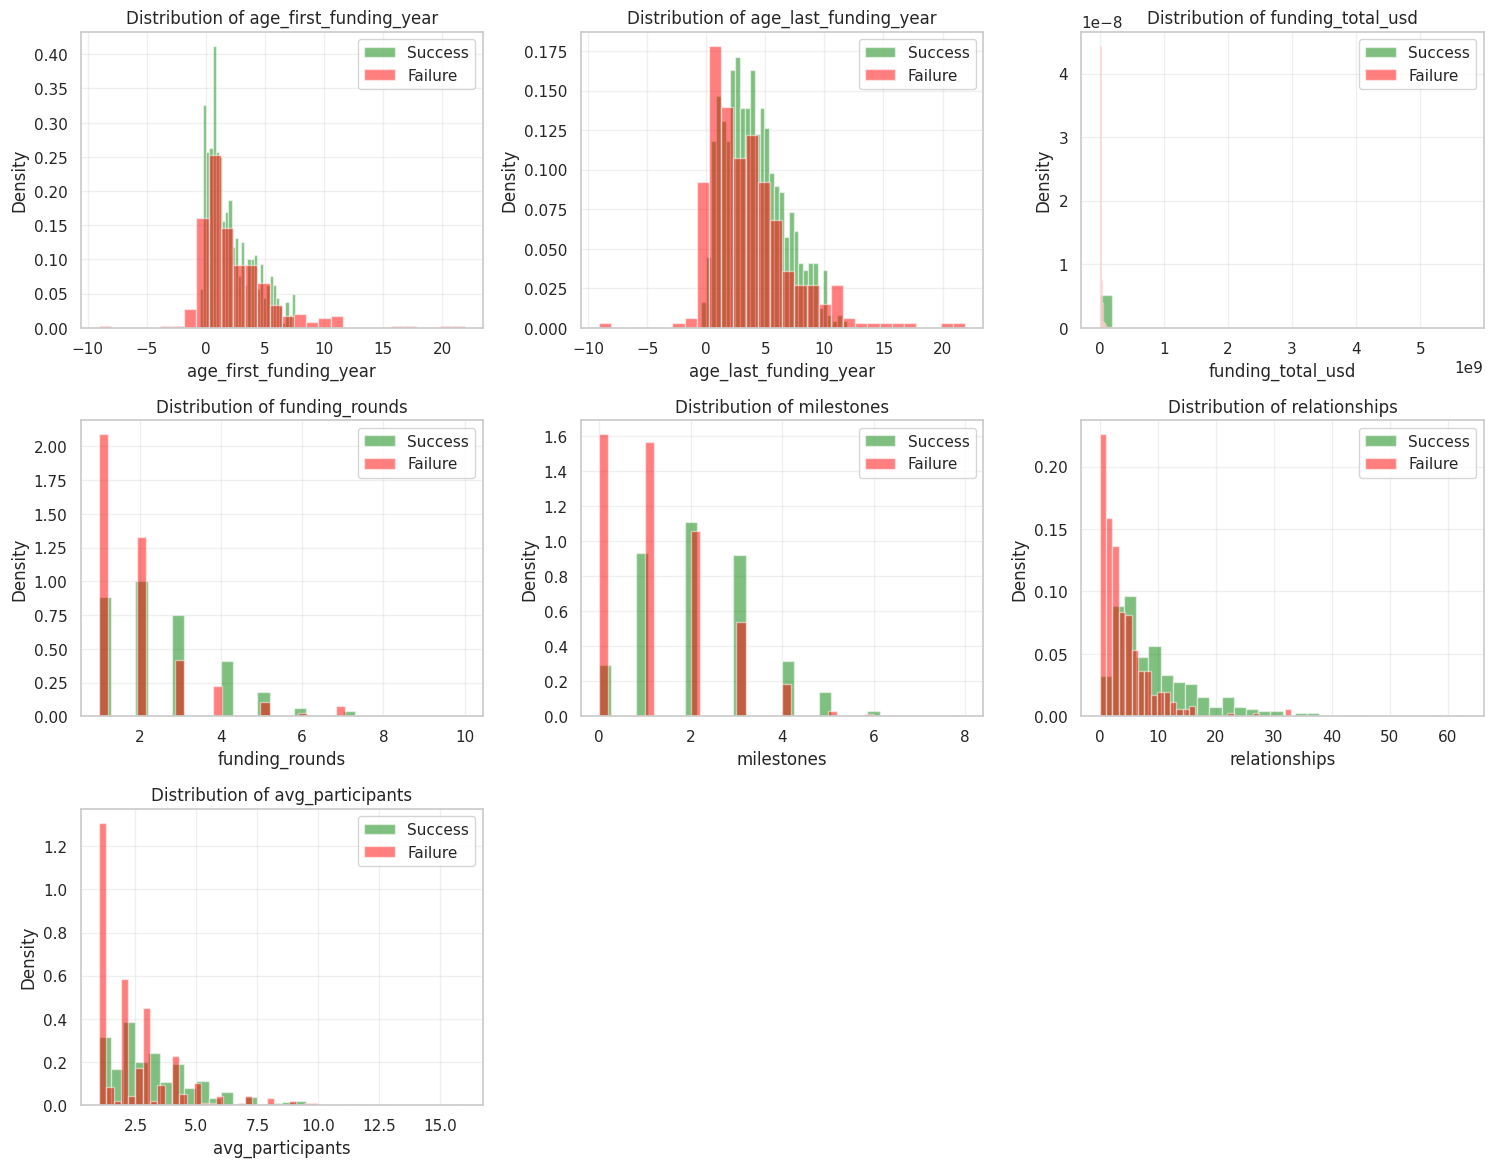

In [703]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(quantitative_vars[:7]):
    # Success vs Failure comparison
    success_data = df[df['status'] == 'acquired'][var].dropna()
    failure_data = df[df['status'] == 'closed'][var].dropna()
    
    # Histogram with KDE
    axes[i].hist(success_data, bins=30, alpha=0.5, color='green', 
                 label='Success', density=True)
    axes[i].hist(failure_data, bins=30, alpha=0.5, color='red', 
                 label='Failure', density=True)
    axes[i].set_title(f'Distribution of {var}', fontsize=12)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(quantitative_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [704]:
# Let's look at percentage of missing values

print("Percentage of missing values in 'closed_at' column: % {:.2f}". format((df.closed_at.isnull().sum())/len(df)*100))
print("Percentage of missing values in 'Unnamed: 6' column: % {:.2f}". format((df["Unnamed: 6"].isnull().sum())/len(df)*100))
print("Percentage of missing values in 'age_last_milestone_year' column  : % {:.2f}". format((df.age_last_milestone_year.isnull().sum())/len(df)*100))
print("percentage of missing values in 'age_first_milestone_year' column : % {:.2f}". format((df.age_first_milestone_year.isnull().sum())/len(df)*100))

Percentage of missing values in 'closed_at' column: % 63.71
Percentage of missing values in 'Unnamed: 6' column: % 53.41
Percentage of missing values in 'age_last_milestone_year' column  : % 16.47
percentage of missing values in 'age_first_milestone_year' column : % 16.47


In [705]:
#  "Unnamed: 6", "Unnamed: 0", "id", "closed_at" columns are not necessary so drop it
df.drop(["Unnamed: 6"],axis=1, inplace=True)
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.drop(["id"], axis=1, inplace=True)
df.drop(["closed_at"], axis=1, inplace=True)

In [706]:
for index, row in df.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])

# "state_code" column and "state_code.1" column must be the same, so we should drop the "state_code.1" and also, 
# "state_code.1" column has a one missing value in the 515. row.

515 CA nan


In [707]:
df.drop(["state_code.1"], axis=1, inplace=True)

In [708]:
# "status_closed" column is for prediction of startup success and this is binary classification so we should convert numerical variable
df['success'] = (df['status'] == 'acquired').astype(int)

In [709]:
# Year columns must be converted to datetime type

df.founded_at=pd.to_datetime(df.founded_at)
df.first_funding_at=pd.to_datetime(df.first_funding_at)
df.last_funding_at=pd.to_datetime(df.last_funding_at)

In [710]:
import numpy as np

In [711]:
# we must get the absolute value of columns including negative value

df["age_first_funding_year"]=np.abs(df["age_first_funding_year"])
df["age_last_funding_year"]=np.abs(df["age_last_funding_year"])
df["age_first_milestone_year"]=np.abs(df["age_first_milestone_year"])
df["age_last_milestone_year"]=np.abs(df["age_last_milestone_year"])

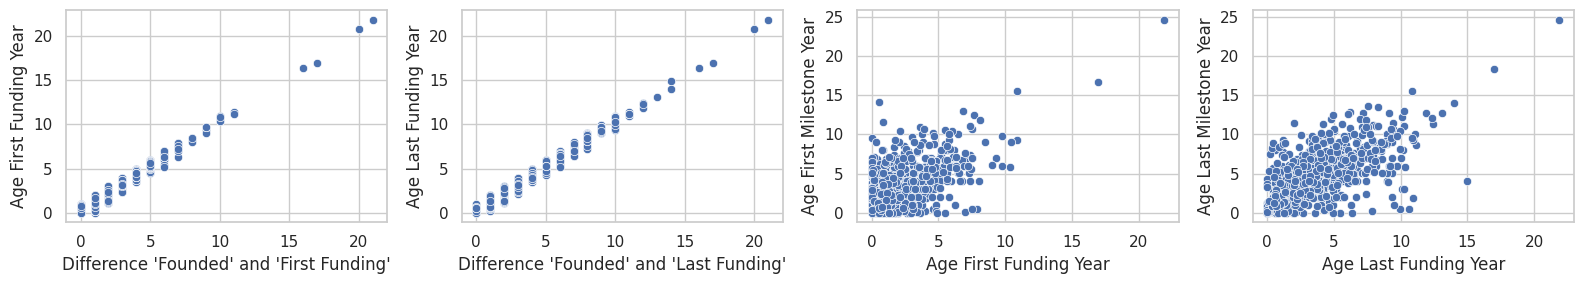

In [712]:
plt.figure(figsize=(16, 3), dpi=100)

# 1. Difference between Founded and First Funding vs age_first_funding_year
plt.subplot(1, 4, 1)
sns.scatterplot(x=np.abs(df["first_funding_at"].dt.year - df["founded_at"].dt.year), 
                y=df["age_first_funding_year"])
plt.xlabel("Difference 'Founded' and 'First Funding'")
plt.ylabel("Age First Funding Year")

# 2. Difference between Founded and Last Funding vs age_last_funding_year
plt.subplot(1, 4, 2)
sns.scatterplot(x=np.abs(df["last_funding_at"].dt.year - df["founded_at"].dt.year), 
                y=df["age_last_funding_year"])
plt.xlabel("Difference 'Founded' and 'Last Funding'")
plt.ylabel("Age Last Funding Year")

# 3. Age First Funding Year vs Age First Milestone Year
plt.subplot(1, 4, 3)
sns.scatterplot(x=df["age_first_funding_year"], 
                y=df["age_first_milestone_year"])
plt.xlabel("Age First Funding Year")
plt.ylabel("Age First Milestone Year")

# 4. Age Last Funding Year vs Age Last Milestone Year
plt.subplot(1, 4, 4)
sns.scatterplot(x=df["age_last_funding_year"], 
                y=df["age_last_milestone_year"])
plt.xlabel("Age Last Funding Year")
plt.ylabel("Age Last Milestone Year")

plt.tight_layout()
plt.show()

In [713]:
# fill the missing values by mean() function

df["age_first_milestone_year"] = df["age_first_milestone_year"].fillna((df["age_first_milestone_year"].mean()))
df["age_last_milestone_year"] = df["age_last_milestone_year"].fillna((df["age_last_milestone_year"].mean()))

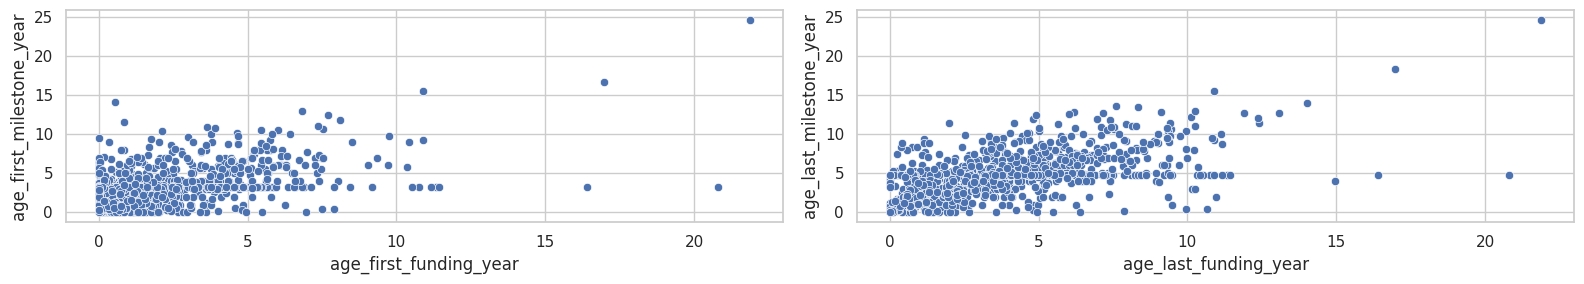

In [714]:
# visualize relationships

plt.figure(figsize=(16, 3), dpi=100)

plt.subplot(1, 2, 1)
sns.scatterplot(x=df["age_first_funding_year"], 
                y=df["age_first_milestone_year"])

plt.subplot(1, 2, 2)
sns.scatterplot(x=df["age_last_funding_year"], 
                y=df["age_last_milestone_year"])

plt.tight_layout()
plt.show()

In [715]:
df.describe()

,latitude,longitude,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,success
count,923.000000,923.000000,923.000000,923,923,923,923.000000,923.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,38.517442,-103.539212,0.646804,2005-09-10 00:57:43.488624128,2007-12-05 01:05:31.527627264,2009-08-15 00:31:12.156013056,2.304274,3.963252,3.227575,4.817909,...,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.646804
min,25.752358,-122.756956,0.000000,1984-01-01 00:00:00,2000-01-01 00:00:00,2001-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,37.388869,-122.198732,0.000000,2003-01-01 00:00:00,2006-03-01 00:00:00,2008-01-01 00:00:00,0.593150,1.736950,1.349300,2.969850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,37.779281,-118.374037,1.000000,2006-01-01 00:00:00,2007-09-01 00:00:00,2009-12-16 00:00:00,1.471200,3.545200,3.227575,4.817909,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000
75%,40.730646,-77.214731,1.000000,2008-04-01 00:00:00,2009-11-01 00:00:00,2011-04-29 00:00:00,3.583550,5.561600,4.002700,6.058900,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,59.335232,18.057121,1.000000,2013-04-16 00:00:00,2013-11-20 00:00:00,2013-11-20 00:00:00,21.895900,21.895900,24.684900,24.684900,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000
std,3.741497,22.394167,0.478222,NaN,NaN,NaN,2.447524,2.925268,2.548902,2.847542,...,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222


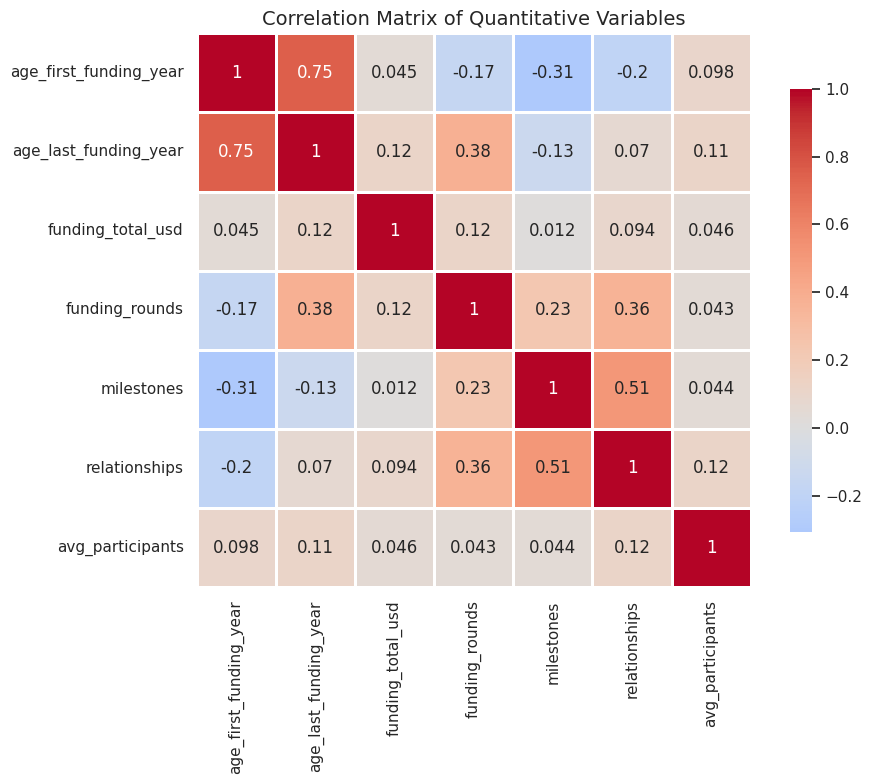

Top Positive Correlations:
age_first_funding_year - age_last_funding_year: 0.752
milestones - relationships: 0.514
age_last_funding_year - funding_rounds: 0.382
funding_rounds - relationships: 0.359
funding_rounds - milestones: 0.230


In [716]:
# Calculate correlation matrix
corr_matrix = df[quantitative_vars].corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Quantitative Variables', fontsize=14)
plt.tight_layout()
plt.show()

# Top correlations
print("Top Positive Correlations:")
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
top_pairs = [(i, j, corr_pairs[(i, j)]) 
             for i, j in corr_pairs.index 
             if i != j and i < j]
for pair in top_pairs[:5]:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

In [717]:
# VIF analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select predictors to check
predictors_to_check = ['age_first_funding_year', 'age_last_funding_year', 
                       'milestones', 'relationships', 'funding_rounds', 
                       'funding_total_usd', 'has_VC', 'is_top500', 'avg_participants']

# Filter to existing columns
existing_predictors = [p for p in predictors_to_check if p in df.columns]

# Prepare data
X = df[existing_predictors].copy().fillna(0)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF
vif_data = vif_data.sort_values("VIF", ascending=False)

print("Variance Inflation Factor (VIF) Analysis:")
print(vif_data.to_string(index=False))

Variance Inflation Factor (VIF) Analysis:
              Variable       VIF
 age_last_funding_year 16.089440
        funding_rounds  8.745852
age_first_funding_year  8.398782
             is_top500  5.741510
            milestones  3.816687
      avg_participants  3.552745
         relationships  3.305159
                has_VC  1.855674
     funding_total_usd  1.044150


In [718]:
from sklearn.model_selection import train_test_split

predictors = [
    'funding_total_usd',      # VIF = 1.04 (very clean)
    'has_VC',                 # VIF = 1.85 (clean)
    'is_top500',              # VIF = 4.62 (acceptable)
    'milestones',             # VIF = 3.80 (acceptable)
    'avg_participants',       # VIF = 3.55 (acceptable) 
    'age_first_funding_year'  # VIF = 8.13 (highest, but needed for timing)
    ]

# Prepare data for Model 1
X_basic = df[predictors].copy()
y = df['success'].copy()

# Handle missing values
X_basic = X_basic.fillna(X_basic.median())

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_basic, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Training success rate: {y_train.mean()*100:.2f}%")
print(f"Test success rate: {y_test.mean()*100:.2f}%")

Training set size: 646
Test set size: 277
Training success rate: 64.71%
Test success rate: 64.62%


In [719]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import statsmodels.api as sm

# Add constant for statsmodels
X_train_sm = sm.add_constant(X_train)

# Fit logistic regression
model1_sm = sm.Logit(y_train, X_train_sm)
result1 = model1_sm.fit()

print("Logistic Regression (5 predictors)")
print("\nPredictors:")
for i, predictor in enumerate(predictors):
    print(f"  {i+1}. {predictor}")


Optimization terminated successfully.
         Current function value: 0.542001
         Iterations 8
Logistic Regression (5 predictors)

Predictors:
  1. funding_total_usd
  2. has_VC
  3. is_top500
  4. milestones
  5. avg_participants
  6. age_first_funding_year


In [720]:
print("Log regression results (Statsmodels):")
print(result1.summary())

Log regression results (Statsmodels):
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                  646
Model:                          Logit   Df Residuals:                      639
Method:                           MLE   Df Model:                            6
Date:                Fri, 05 Dec 2025   Pseudo R-squ.:                  0.1652
Time:                        04:24:40   Log-Likelihood:                -350.13
converged:                       True   LL-Null:                       -419.41
Covariance Type:            nonrobust   LLR p-value:                 2.014e-27
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.7426      0.286     -6.095      0.000      -2.303      -1.182
funding_total_usd       3.039e-09   3.27e-09      0.930  

In [721]:
# Calculate odds ratios
odds_ratios = pd.DataFrame({
    'predictor': ['const'] + predictors,
    'coef': result1.params,
    'std_err': result1.bse,
    'z_value': result1.tvalues,
    'p_value': result1.pvalues,
    'odds_ratio': np.exp(result1.params)
})

print("Odds rations interpretation")
print("\nFor each unit increase in predictor, the odds of success change by:")
for i, row in odds_ratios.iterrows():
    if row['predictor'] != 'const':
        change = (row['odds_ratio'] - 1) * 100
        significance = "***" if row['p_value'] < 0.001 else "**" if row['p_value'] < 0.01 else "*" if row['p_value'] < 0.05 else ""
        print(f"  {row['predictor']}: {change:+.1f}% {significance}")

Odds rations interpretation

For each unit increase in predictor, the odds of success change by:
  funding_total_usd: +0.0% 
  has_VC: -20.5% 
  is_top500: +243.4% ***
  milestones: +78.5% ***
  avg_participants: +18.6% **
  age_first_funding_year: -3.6% 


In [722]:

# Make predictions
X_test_sm = sm.add_constant(X_test)
y_pred_prob = result1.predict(X_test_sm)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = (y_pred == y_test).mean()
roc_auc = roc_auc_score(y_test, y_pred_prob)


print("Model performance of test set")
print(f"Accuracy: {accuracy:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Failure', 'Success']))

Model performance of test set
Accuracy: 0.715
ROC-AUC: 0.736

Classification Report:
              precision    recall  f1-score   support

     Failure       0.62      0.50      0.55        98
     Success       0.75      0.83      0.79       179

    accuracy                           0.71       277
   macro avg       0.69      0.67      0.67       277
weighted avg       0.71      0.71      0.71       277



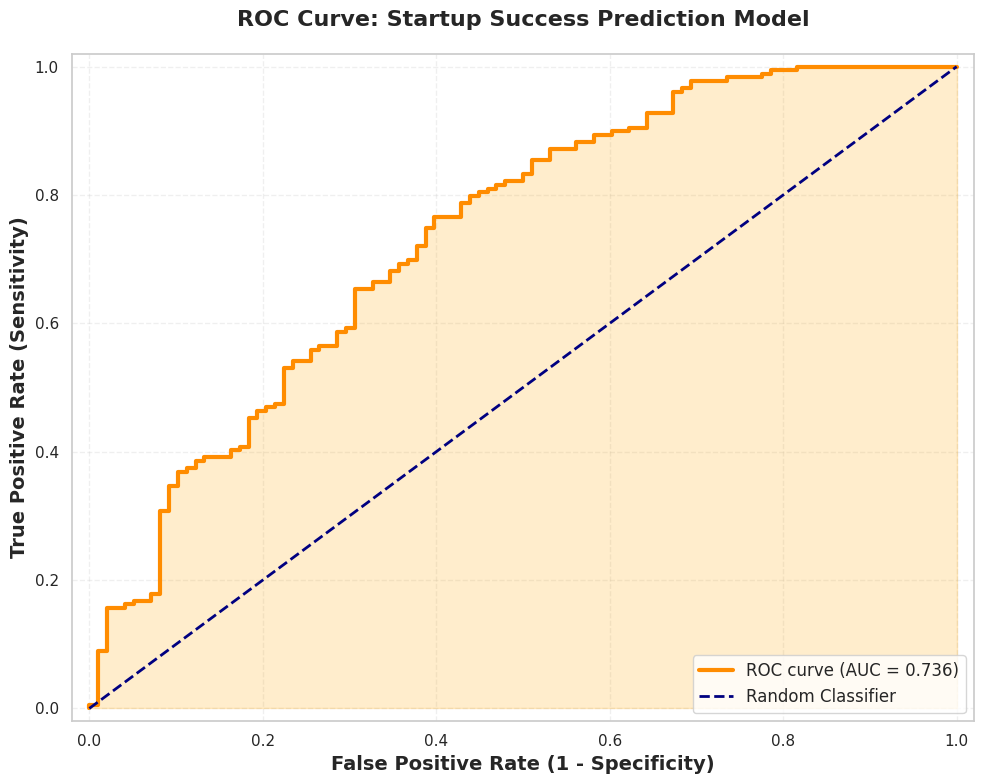

In [723]:
plt.figure(figsize=(10, 8))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=3, 
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Random Classifier')

# Fill area under curve
plt.fill_between(fpr, tpr, alpha=0.2, color='orange')

# Labels and title
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14, fontweight='bold')
plt.title('ROC Curve: Startup Success Prediction Model', 
          fontsize=16, fontweight='bold', pad=20)

# Add grid and legend
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(loc='lower right', fontsize=12)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])

plt.tight_layout()
plt.show()

### Model Fit Statistics
`Pseudo R2 = 0.1652`: Model explains 16.5% of variance in startup success

Significant Model: `LLR p-value = 2.014e-27` (highly significant)

Convergence: Successful in 8 iterations

Baseline Comparison: LL improved from -419.41 (null) to -350.13 (model)

**Interpretation:** The model is statistically significant but has moderate explanatory power. This is typical for business/social science data where many unmeasurable factors (team dynamics, market timing, luck) affect outcomes.

### Model Performance
**Accuracy**
- `Accuracy = 71.5%`
- Baseline: Randomly guessing "success" would yield 64.6% accuracy
- Improvement: Model provides 6.9% improvement over baseline. Acceptable but not excellent

**ROC-AUC**
- `ROC-AUC = 0.736`
- Model has 73.6% chance of correctly ranking a random successful startup higher than a random failed one

### Significant Predictors

**1. is_top500**
- `Coefficient: 1.2336, p < 0.001`
- `Odds Ratio: e^1.2336 = 3.434`
- **Interpretation:** 243.4% increase in odds
- **Business Meaning:** Top 500 recognition is the strongest predictor of success
- Startups in top 500 lists have 3.4x higher odds of success
- Practical Implication: Market validation and visibility matter tremendously

**2. milestones**
- `Coefficient: 0.5796, p < 0.001`
- `Odds Ratio: e^0.5796 = 1.785`
- **Interpretation:** 78.5% increase in odds per milestone
- **Business Meaning:** Execution capability is critical
- Each additional milestone increases success odds by 78.5%
- **Practical Implication:** Focus on achieving tangible milestones

**3. avg_participants**
- `Coefficient: 0.1704, p = 0.005`
- `Odds Ratio: e^0.1704 = 1.186`
- **Interpretation:** 18.6% increase in odds per participant
- **Business Meaning:** Investor syndicate size matters
- Each additional average participant increases odds by 18.6%
- **Practical Implication:** Broader investor interest signals validation

### Hypotheses testing results
**Funding amount**
- H1: Startups with higher total funding amounts are more likely to succeed
- Rejecting H1 - no statistically significant relationship between funding amount and success when controlling for other factors
- `Coefficient: 3.039e-09 (essentially zero)`
- `p-value: 0.352 (> 0.05)`
- **Interpretation:** Funding amount alone doesn't predict success; it's what you do with the money that matters

**Funding Amount Hypothesis**
- H1: Startups with higher total funding amounts are more likely to succeed
- Reject H1 - no statistically significant relationship
- `Coefficient: 3.039e-09 (essentially zero)`
- `p-value: 0.352 (> 0.05)`
- `Odds Ratio: ~1.000 (0.0% change)`
- **Interpretation:** Funding amount alone doesn't predict success - it's what you do with the money that matters

**Milestone Hypothesis**
- H1: Startups achieving more milestones have a higher probability of success
- **Result:** Strongly support H1 (Reject H₀)
- `Coefficient: 0.5796` (positive and significant)
- `p-value: < 0.001` (highly significant)
- `Odds Ratio: 1.785` (78.5% increase per milestone)
- **Interpretation:** Each milestone significantly increases success odds; execution capability is critical

**Geographical Hypothesis**
- H1: Startups based in major startup hubs (CA, NY, MA, TX) are more likely to succeed
- **Result:** Not tested in current model
- **Recommendation:** Requires separate analysis with location variables

**Investment Stage Hypothesis**
- H1: Startups securing later-stage funding (Round C/D) are more likely to succeed
- **Result:** Not directly tested
- **Indirect evidence:** avg_participants shows investor syndicate size matters
- **Recommendation:** Include has_roundC and has_roundD variables

**Industry Hypothesis**
- H1: Startups in technology-driven sectors have higher success rates
- **Result:** Not tested in current model
- **Recommendation:** Add industry dummies or category_code analysis

**Investor Type Hypothesis**
- H1: Startups backed by venture capital are more likely to succeed
- **Result:** Reject H1 - no significant relationship
- `Coefficient: -0.2297` (negative direction)
- `p-value: 0.250 (> 0.05)`
- `Odds Ratio: 0.795` (20.5% decrease, but not significant)
- **Interpretation:** VC backing alone doesn't guarantee success when controlling for other factors

**Top 500 Hypothesis**
- H1: Startups listed as "top 500" are more likely to succeed
- **Result:** Strongly support H1 (Reject H₀)
- Coefficient: 1.2336 (largest positive effect)
- `p-value: < 0.001 `(highly significant)
- `Odds Ratio: 3.434` (243.4% increase)
- **Interpretation:** Top 500 status is the strongest predictor of success; market validation is critical

**Funding Speed Hypothesis**
- H1: Startups with shorter intervals between founding and first funding are more likely to succeed
- **Result:** Reject H1 - no significant relationship
- Coefficient: -0.0368 (negative but small)
- `p-value: 0.333` (> 0.05)
- `Odds Ratio: 0.964` (3.6% decrease per year, not significant)
- **Interpretation:** Timing of first funding matters less than execution after funding

**Network Hypothesis**
- H1: Startups with more relationships have higher success rates
- **Result:** Partially supported through proxy variable
- **Proxy evidence:** avg_participants is significant (p=0.005)
- `Odds Ratio for avg_participants: 1.186 `(18.6% increase per participant)
- **Interpretation:** Investor network size matters, but general relationships not tested

**Operational Longevity Hypothesis**
- H1: Startups that achieve first milestone sooner are more likely to succeed
- **Result:** Not directly tested
- **Related finding:** milestones (total count) is highly significant
- **Interpretation:** Milestone achievement matters, but timing of first milestone not tested

### General conclusions
The study challenges several conventional wisdoms in startup investing:
- **Capital is not king:** Total funding amount shows no statistically significant relationship with success when controlling for other factors. This contradicts the common belief that "more funding equals higher success.
- **VC backing is not a silver bullet:** Venture capital investment alone does not guarantee success. In fact, the model shows a negative (though insignificant) relationship, suggesting that VC-backed startups may face higher expectations or undertake riskier ventures.
- **Speed to funding is overrated:** The timing of first funding does not significantly impact success outcomes, shifting focus from fundraising speed to execution quality.

  
**Primary Determinants of Startup Success:**

> **A. Market Validation is Paramount**

- Top 500 status emerges as the strongest predictor (243% increase in odds)
- External recognition and market validation matter more than internal metrics
- Implication: Startups should prioritize credibility-building and market positioning

> **B. Execution Excellence is Non-Negotiable**

- Each additional milestone increases success odds by 78.5%
- Consistent execution trumps initial funding and timing advantages
- Implication: Focus on delivering tangible results and measurable progress

> **C. Investor Syndicate Quality Matters**

- Average number of participants shows significant positive impact (18.6% increase per participant)
- Implication: Broad investor interest signals validation; avoid over-reliance on single investors

---
Part 2 - Cluster analysis.
---

In [724]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('startup_data.csv')

df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


1. Formulate the goal, objectives, and hypotheses of the research (at least 10
hypotheses).

In [725]:
# used llm for md formatting

Based on the comprehensive data analysis provided in the Jupyter Notebook, here is a summary of the research goals, objectives, hypotheses, and conclusions for your project.

Research Goal:

The primary goal of this research is to investigate the factors influencing the success or failure of startup companies. Specifically, the study aims to identify key predictors such as geographic location, funding history, industry category, and developmental milestones that correlate with a startup's likelihood of being acquired versus closing down.

Research Objectives:

Analyze Geographic Influence: Determine how a startup's location (state, city, coordinates) impacts its success rate and access to funding.

Evaluate Funding Patterns: Assess the relationship between funding rounds, total funding raised, and investor types (VC, Angel) with startup outcomes.

Examine Industry Trends: Identify which industry categories (e.g., software, web, mobile, enterprise) have higher success rates.

Assess Developmental Milestones: Investigate the impact of the timing and number of milestones on a startup's trajectory.

Profile Successful Startups: Create profiles or clusters of startups to distinguish common characteristics of successful versus unsuccessful ventures.

In [726]:
# research hypotheses

1. Geographic Influence (State of California)

H₀: The location of a startup in the state of California (CA) does not statistically significantly affect the likelihood of its acquisition (success).
H₁: Startups located in California have a higher likelihood of success (acquisition) than startups in other states.


2. Funding Volume

H₀: The total volume of funds raised (funding_total_usd) is not correlated with the startup’s status (success).
H₁: There is a positive correlation between the total funds raised and the likelihood that a startup will be acquired.


3. Number of Funding Rounds

H₀: The number of funding rounds (funding_rounds) does not influence the final status of the startup.
H₁: Startups with more funding rounds are more likely to succeed (be acquired).


4. Investor Type (Venture Capital)

H₀: The presence of venture capital (has_VC) does not affect the success of a startup compared to other types of financing.
H₁: Startups backed by venture capital have a higher level of success.


5. Industry Category (Web/Software)

H₀: The industry category does not affect the startup’s funding.
H₁: Startups in the "Software," category have more funding than in other categories. (e.g. is_othercategory and is_gamesvideo)


6. Number of Investors (Participants)

H₀: The average number of participants in funding rounds (avg_participants) is not related to the startup’s success.
H₁: A larger number of investors participating in rounds positively correlates with the likelihood of success.


7. Top 500 Ranking

H₀: Belonging to the "Top 500" list (is_top500) does not affect the likelihood that a startup will be acquired.
H₁: Startups from the "Top 500" list have a statistically significantly higher chance of success.


8. Networking Effect (Relationships)

H₀: The number of professional connections (relationships) a startup has does not influence its success.
H₁: Companies with more documented connections are more likely to be acquired.


2) Perform a descriptive data analysis (frequency analysis, descriptive statistics, graphs).

In [727]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [728]:
# also lets check unique vals by each cat

categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    # skim ambigous cols
    if column in ['last_funding_at', 'first_funding_at', 'Unnamed: 6', 'closed_at','zip_code', 'id', 'city', 'name', 'founded_at', 'object_id']:
        continue
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("\n")


Unique values in column 'state_code':
['CA' 'MA' 'KY' 'NY' 'CO' 'VA' 'TX' 'WA' 'IL' 'NC' 'PA' 'GA' 'NH' 'MO'
 'FL' 'NJ' 'WV' 'MI' 'DC' 'CT' 'MD' 'OH' 'TN' 'MN' 'RI' 'OR' 'UT' 'ME'
 'NV' 'NM' 'IN' 'AZ' 'ID' 'AR' 'WI']


Unique values in column 'state_code.1':
['CA' 'MA' 'KY' 'NY' 'CO' 'VA' 'TX' 'WA' 'IL' 'NC' 'PA' 'GA' 'NH' 'MO'
 'FL' 'NJ' 'WV' 'MI' 'DC' 'CT' 'MD' 'OH' 'TN' 'MN' 'RI' 'OR' 'UT' 'ME'
 'NV' 'NM' 'IN' nan 'AZ' 'ID' 'AR' 'WI']


Unique values in column 'category_code':
['music' 'enterprise' 'web' 'software' 'games_video' 'network_hosting'
 'finance' 'mobile' 'education' 'public_relations' 'security' 'other'
 'photo_video' 'hardware' 'ecommerce' 'advertising' 'travel' 'fashion'
 'analytics' 'consulting' 'biotech' 'cleantech' 'search' 'semiconductor'
 'social' 'medical' 'automotive' 'messaging' 'manufacturing' 'hospitality'
 'news' 'transportation' 'sports' 'real_estate' 'health']


Unique values in column 'status':
['acquired' 'closed']




In [729]:
# lets checkout missing vals (used code from homework) 

missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Percent of missing values' : missing})
missing

,Percent of missing values
closed_at,63.705309
Unnamed: 6,53.412784
age_first_milestone_year,16.468039
age_last_milestone_year,16.468039
state_code.1,0.108342


In [730]:
# as we can see there are lots of missing records at closed_at, so it is reasonable to drop it


df = df.drop(columns=["closed_at", "Unnamed: 6"])

# and drop na at the rest

df = df.dropna()

missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Percent of missing values' : missing})
missing

,Percent of missing values


In [731]:
# we still have allowed amount of records

len(df)

770

In [732]:
# we have required amount of numeric and cat vars
# used llm to get this snippet

import numpy as np

def split_types(df, cat_thresh=20):
    numeric = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical = df.select_dtypes(include=['object','category','bool']).columns.tolist()
    for col in numeric.copy():
        if df[col].nunique(dropna=False) <= cat_thresh:
            numeric.remove(col)
            categorical.append(col)
    return numeric, categorical

num_cols, cat_cols = split_types(df, cat_thresh=20)
print("Numeric:", num_cols)
print("Categorical:", cat_cols)

Numeric: ['Unnamed: 0', 'latitude', 'longitude', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_total_usd', 'avg_participants']
Categorical: ['state_code', 'zip_code', 'id', 'city', 'name', 'founded_at', 'first_funding_at', 'last_funding_at', 'state_code.1', 'category_code', 'object_id', 'status', 'labels', 'funding_rounds', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'is_top500']


In [733]:

def numeric_summary(df, num_cols):
    if not num_cols:
        print("Нет числовых столбцов.")
        return pd.DataFrame()
    desc = df[num_cols].describe().T
    desc['median'] = df[num_cols].median()
    desc['iqr'] = df[num_cols].quantile(0.75) - df[num_cols].quantile(0.25)
    desc['skew'] = df[num_cols].skew()
    desc['kurtosis'] = df[num_cols].kurtosis()
    desc = desc[['count','mean','std','min','25%','median','75%','max','iqr','skew','kurtosis']]
    
    return desc

numeric_stats = numeric_summary(df, num_cols)
numeric_stats


,count,mean,std,min,25%,median,75%,max,iqr,skew,kurtosis
Unnamed: 0,770.0,5.662597e+02,3.388165e+02,1.000000,2.752500e+02,5.600000e+02,8.697500e+02,1.153000e+03,5.945000e+02,0.026700,-1.261326
latitude,770.0,3.859351e+01,3.594223e+00,25.752358,3.739426e+01,3.777928e+01,4.073065e+01,5.498320e+01,3.336381e+00,0.204008,1.726930
longitude,770.0,-1.038095e+02,2.233514e+01,-122.725662,-1.222637e+02,-1.184875e+02,-7.704293e+01,-1.574631e+00,4.522075e+01,0.807865,-0.095197
age_first_funding_year,770.0,2.016422e+00,2.298123e+00,-9.046600,4.965750e-01,1.306850e+00,3.016425e+00,2.189590e+01,2.519850e+00,2.020592,10.604165
age_last_funding_year,770.0,3.820067e+00,2.880434e+00,-9.046600,1.639725e+00,3.327400e+00,5.363700e+00,2.189590e+01,3.723975e+00,1.033846,2.864517
age_first_milestone_year,770.0,3.054777e+00,2.978949e+00,-14.169900,1.000000e+00,2.519150e+00,4.688350e+00,2.468490e+01,3.688350e+00,0.944475,5.629373
age_last_milestone_year,770.0,4.750610e+00,3.212449e+00,-7.005500,2.397300e+00,4.475350e+00,6.753400e+00,2.468490e+01,4.356100e+00,0.715210,2.087184
relationships,770.0,8.541558e+00,7.403227e+00,0.000000,4.000000e+00,6.000000e+00,1.100000e+01,6.300000e+01,7.000000e+00,2.318462,8.529463
funding_total_usd,770.0,2.648038e+07,2.072468e+08,11000.000000,3.000000e+06,1.000000e+07,2.450000e+07,5.700000e+09,2.150000e+07,26.771878,733.107984
avg_participants,770.0,2.849262e+00,1.896588e+00,1.000000,1.500000e+00,2.500000e+00,3.666700e+00,1.600000e+01,2.166700e+00,1.856408,5.531426


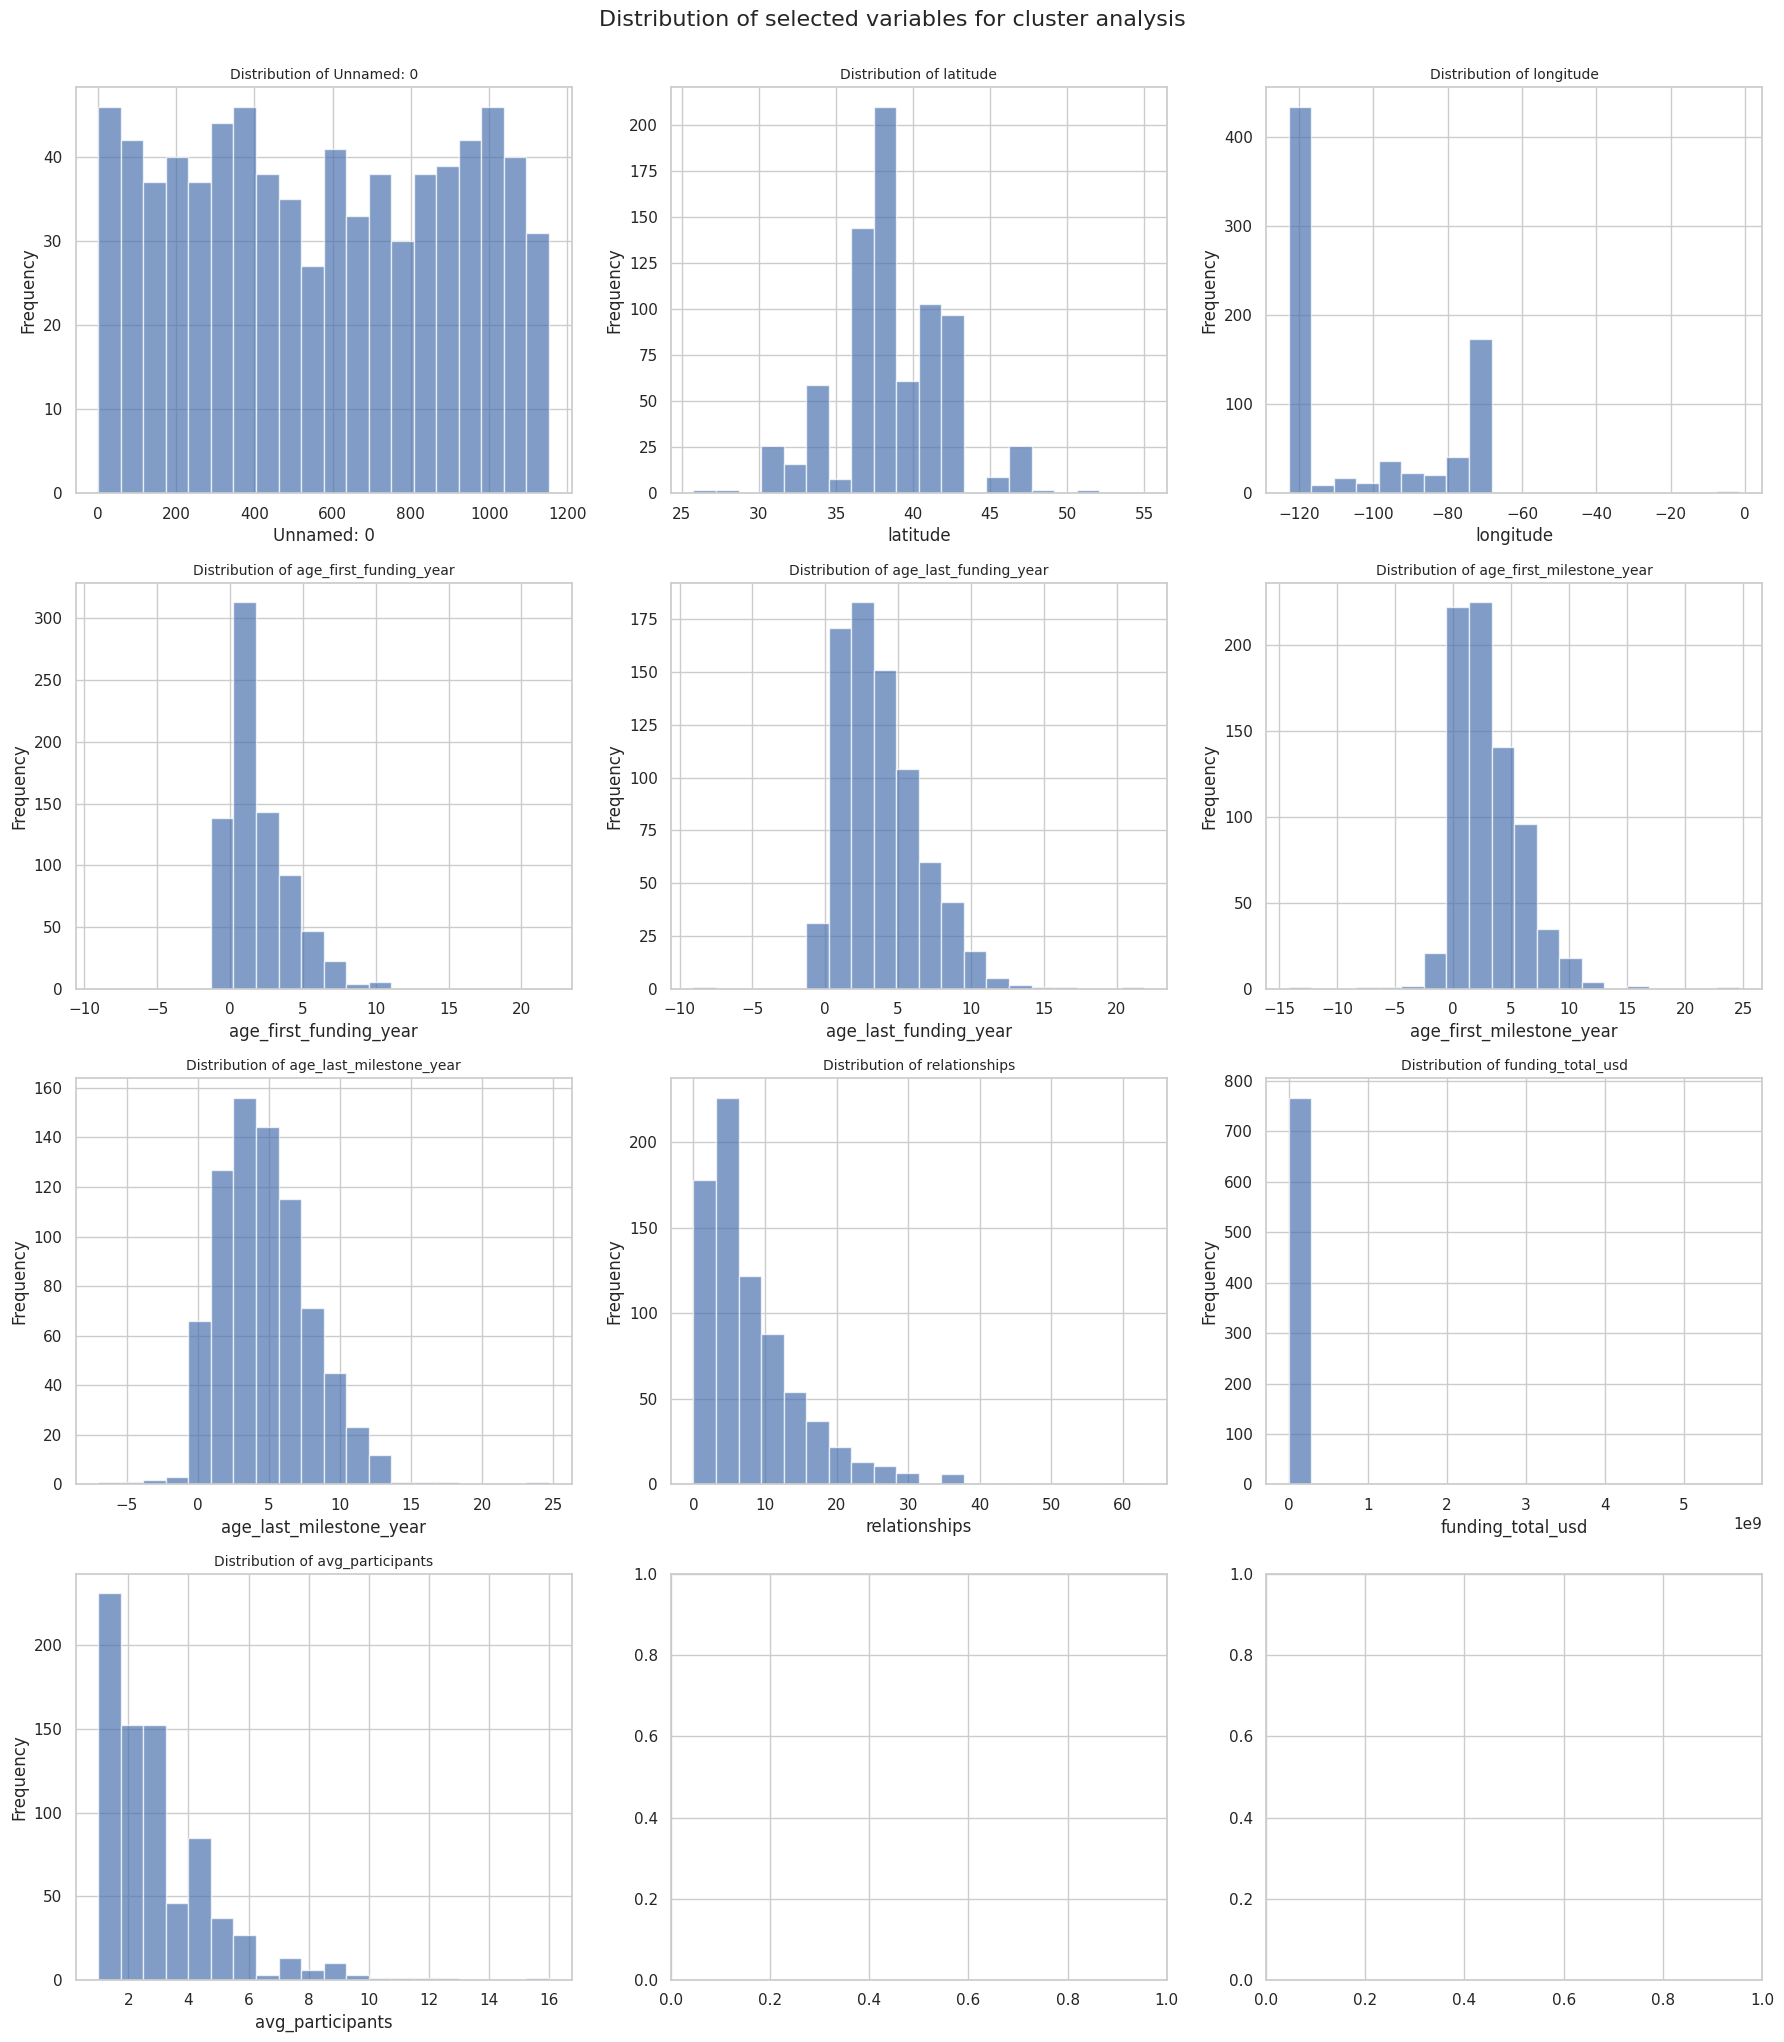

In [734]:
# took this code snippet from hw 4


import matplotlib.pyplot as plt
import seaborn as sns


# Visualize the distribution of selected variables
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
axes = axes.ravel()

for i, var in enumerate(num_cols):
    df[var].hist(bins=20, ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Distribution of {var}', fontsize=10)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Distribution of selected variables for cluster analysis', y=1.02, fontsize=16)
plt.show()

as we can see:


age_first_funding_year - avg 2 years
age_last_funding_year - avg 4 years
age_first_milestone_year - avg 3 years
age_last_milestone_year - avf 4 years 10 months

funding_total_usd - avg 26 480 376 usd
avg_participants - avg 3 people

In [735]:
# at the df below we can see most frequent numeric values 
# used llm here

N = 1
topN = (df.select_dtypes(include=['object','category','bool'])
          .apply(lambda s: s.value_counts(dropna=False).head(N))
          .stack()
          .reset_index()
          .rename(columns={'level_0':'col','level_1':'value', 0:'count'}))
topN['freq'] = topN['count'] / len(df)
topN


,col,value,count,freq
0,1/1/2006,founded_at,44.0,0.057143
1,1/1/2008,first_funding_at,17.0,0.022078
2,1/1/2008,last_funding_at,10.0,0.012987
3,94107,zip_code,26.0,0.033766
4,CA,state_code,413.0,0.536364
5,CA,state_code.1,413.0,0.536364
6,Redwood Systems,name,2.0,0.002597
7,San Francisco,city,119.0,0.154545
8,acquired,status,550.0,0.714286
9,c:28482,id,2.0,0.002597


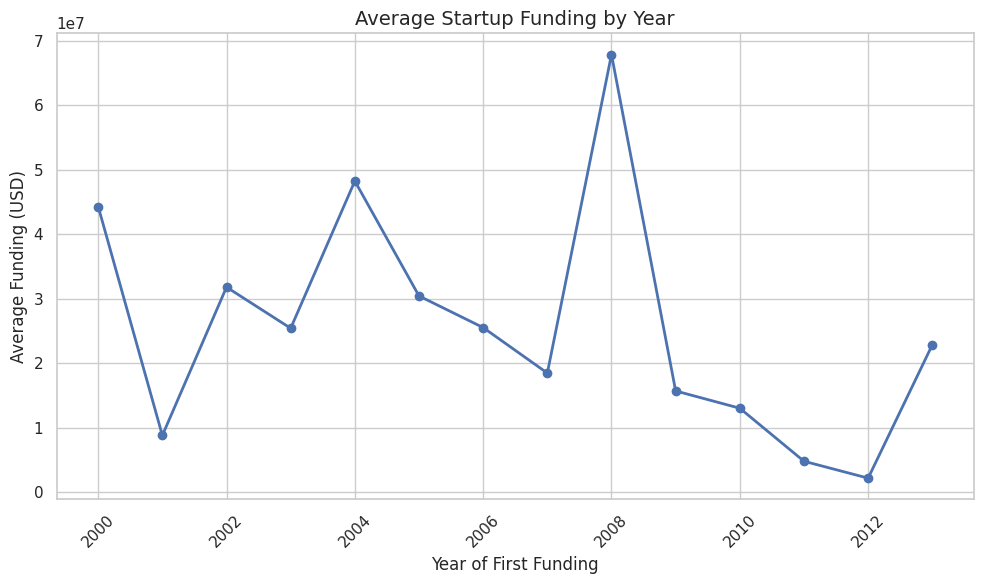

In [736]:
# lets check out financing by year
# used llm

df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')


df['first_funding_year'] = df['first_funding_at'].dt.year


avg_funding_per_year = df.groupby('first_funding_year')['funding_total_usd'].mean()


plt.figure(figsize=(10, 6))
avg_funding_per_year.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Average Startup Funding by Year', fontsize=14)
plt.xlabel('Year of First Funding', fontsize=12)
plt.ylabel('Average Funding (USD)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

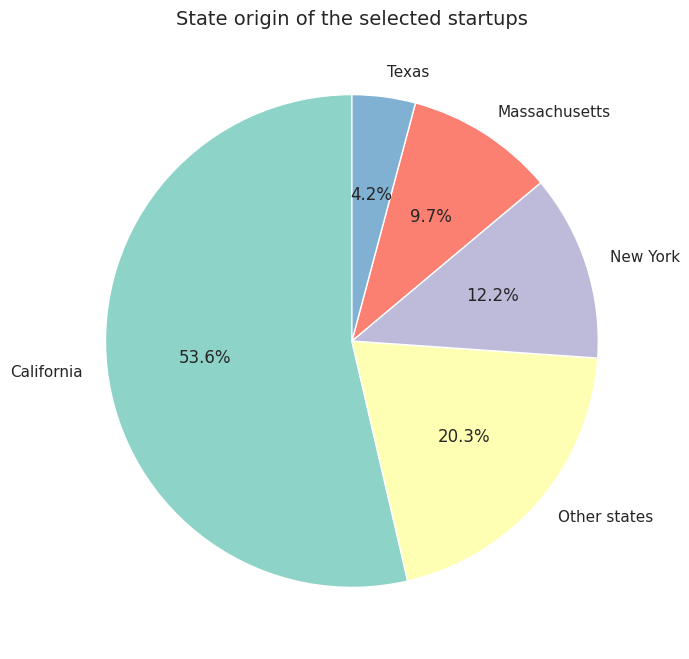

In [737]:
conditions = [
    (df['is_CA'] == 1),
    (df['is_MA'] == 1),
    (df['is_NY'] == 1),
    (df['is_TX'] == 1),
    (df['is_otherstate'] == 1)
]
choices = ['California', 'Massachusetts', 'New York', 'Texas', 'Other states']

df['state'] = np.select(conditions, choices, default='Unknown')

state_counts = df['state'].value_counts()

df_pie = pd.DataFrame({'State': state_counts.index, 'Count': state_counts.values})
df_pie['Percentage'] = (100 * df_pie['Count'] / df_pie['Count'].sum()).round(1)

plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")

plt.pie(df_pie['Count'], labels=df_pie['State'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(df_pie)))
plt.title('State origin of the selected startups', fontsize=14, ha='center')

plt.show()

# so most startups are from california, some from Texas...

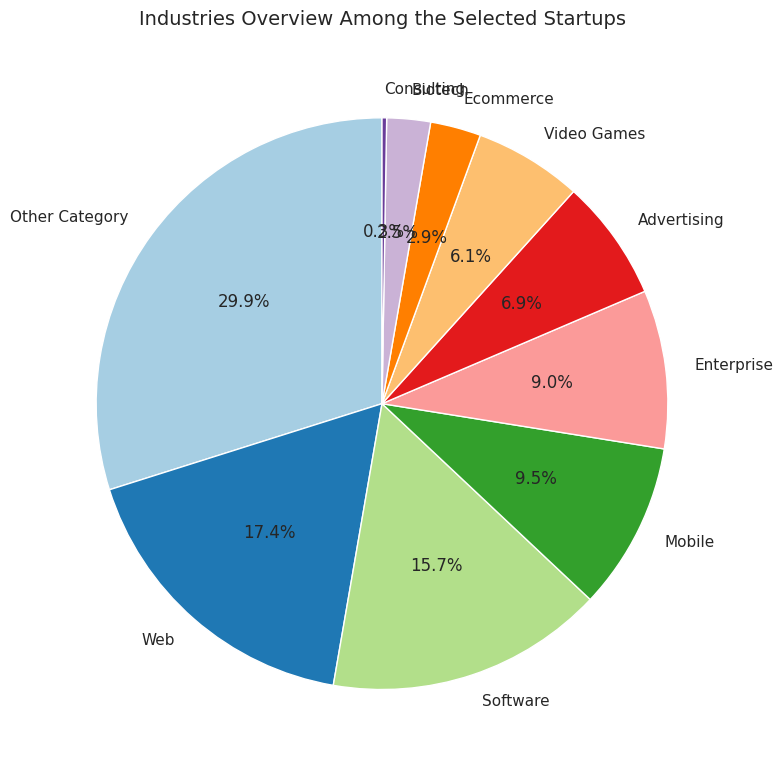

In [738]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new column 'industry' based on the conditions
conditions = [
    (df['is_web'] == 1),
    (df['is_advertising'] == 1),
    (df['is_mobile'] == 1),
    (df['is_enterprise'] == 1),
    (df['is_gamesvideo'] == 1),
    (df['is_ecommerce'] == 1),
    (df['is_biotech'] == 1),
    (df['is_consulting'] == 1),
    (df['is_othercategory'] == 1),
    (df['is_software'] == 1)
]

choices = ['Web', 'Advertising', 'Mobile', 'Enterprise', 'Video Games', 'Ecommerce', 'Biotech', 'Consulting', 'Other Category', 'Software']

df['industry'] = np.select(conditions, choices, default='Unknown')

# Count the number of startups in each industry
industry_counts = df['industry'].value_counts()

# Create a DataFrame for the pie chart
df_pie = pd.DataFrame({'Industry': industry_counts.index, 'Count': industry_counts.values})

# Calculate the percentage for each industry
df_pie['Percentage'] = (100 * df_pie['Count'] / df_pie['Count'].sum()).round(1)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_pie['Count'], labels=df_pie['Industry'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Industries Overview Among the Selected Startups', fontsize=14)

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


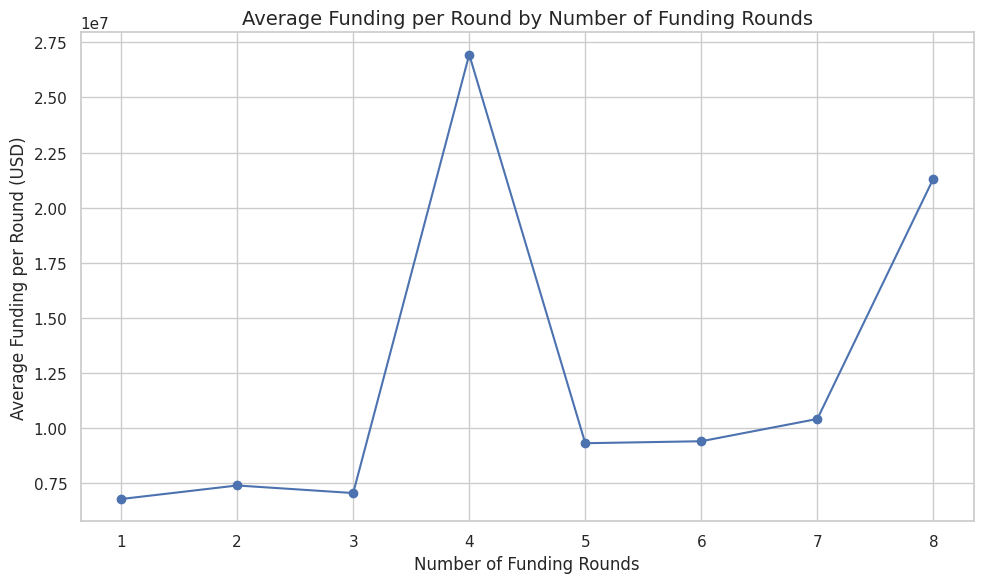

In [739]:
# used llm
df['funding_per_round'] = df['funding_total_usd'] / df['funding_rounds']

avg_funding_per_round = df.groupby('funding_rounds')['funding_per_round'].mean()

plt.figure(figsize=(10, 6))

plt.plot(avg_funding_per_round.index, avg_funding_per_round, marker='o', color='b')

plt.xlabel('Number of Funding Rounds', fontsize=12)
plt.ylabel('Average Funding per Round (USD)', fontsize=12)
plt.title('Average Funding per Round by Number of Funding Rounds', fontsize=14)

plt.grid(True)
plt.tight_layout()

plt.show()

# as we can see most funding was at 4th round

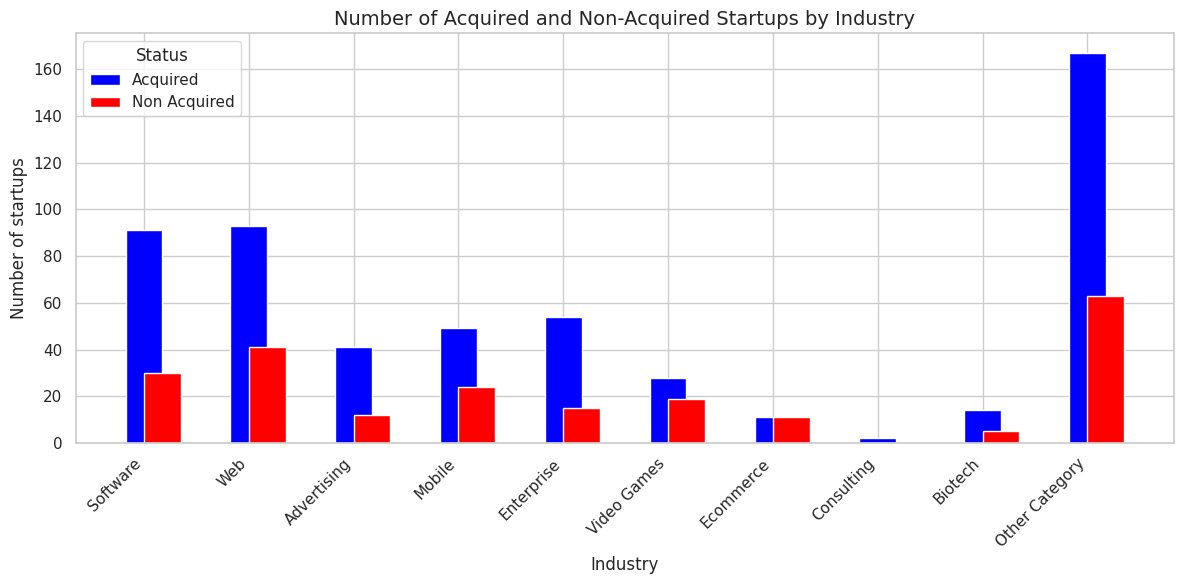

,Industry,Status,Number of startups
0,Software,Category,is_software
1,Web,Category,is_web
2,Advertising,Category,is_advertising
3,Mobile,Category,is_mobile
4,Enterprise,Category,is_enterprise


In [740]:
# used llm

categories = [
    "is_software", "is_web", "is_advertising", "is_mobile", "is_enterprise", 
    "is_gamesvideo", "is_ecommerce", "is_consulting", "is_biotech", "is_othercategory"
]


count_vector_acquired = []
count_vector_non_acquired = []


for category in categories:
    acquired_count = sum((df[category] == 1) & (df['status'] == 'acquired'))
    non_acquired_count = sum((df[category] == 1) & (df['status'] == 'closed'))
    
    count_vector_acquired.append(acquired_count)
    count_vector_non_acquired.append(non_acquired_count)


acquisitions_by_industry = pd.DataFrame({
    'Category': categories,
    'Acquired': count_vector_acquired,
    'Non_acquired': count_vector_non_acquired
})


industry_mapping = {
    "is_software": "Software",
    "is_web": "Web",
    "is_advertising": "Advertising",
    "is_mobile": "Mobile",
    "is_enterprise": "Enterprise",
    "is_gamesvideo": "Video Games",
    "is_ecommerce": "Ecommerce",
    "is_consulting": "Consulting",
    "is_biotech": "Biotech",
    "is_othercategory": "Other Category"
}

acquisitions_by_industry['Industry'] = acquisitions_by_industry['Category'].map(industry_mapping)


acquisitions_melted = acquisitions_by_industry.melt(id_vars='Industry', var_name='Status', value_name='Number of startups')


plt.figure(figsize=(12, 6))


width = 0.35  



plt.bar(acquisitions_melted[acquisitions_melted['Status'] == 'Acquired']['Industry'], 
        acquisitions_melted[acquisitions_melted['Status'] == 'Acquired']['Number of startups'], 
        label='Acquired', color='blue', width=width, align='center')


plt.bar(acquisitions_melted[acquisitions_melted['Status'] == 'Non_acquired']['Industry'], 
        acquisitions_melted[acquisitions_melted['Status'] == 'Non_acquired']['Number of startups'], 
        label='Non Acquired', color='red', width=width, align='edge')


plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of startups', fontsize=12)
plt.title('Number of Acquired and Non-Acquired Startups by Industry', fontsize=14)


plt.xticks(rotation=45, ha='right')


plt.legend(title="Status")


plt.tight_layout()
plt.show()


acquisitions_melted.head()

# so most acquired startups are web and software

3) Explore relationships between variables (contingency tables, Chi-squared tests,
correlations, t-tests, nonparametric tests).

cat vars: ['state_code', 'zip_code', 'id', 'city', 'name', 'founded_at', 'state_code.1', 'category_code', 'object_id', 'status', 'state', 'industry']


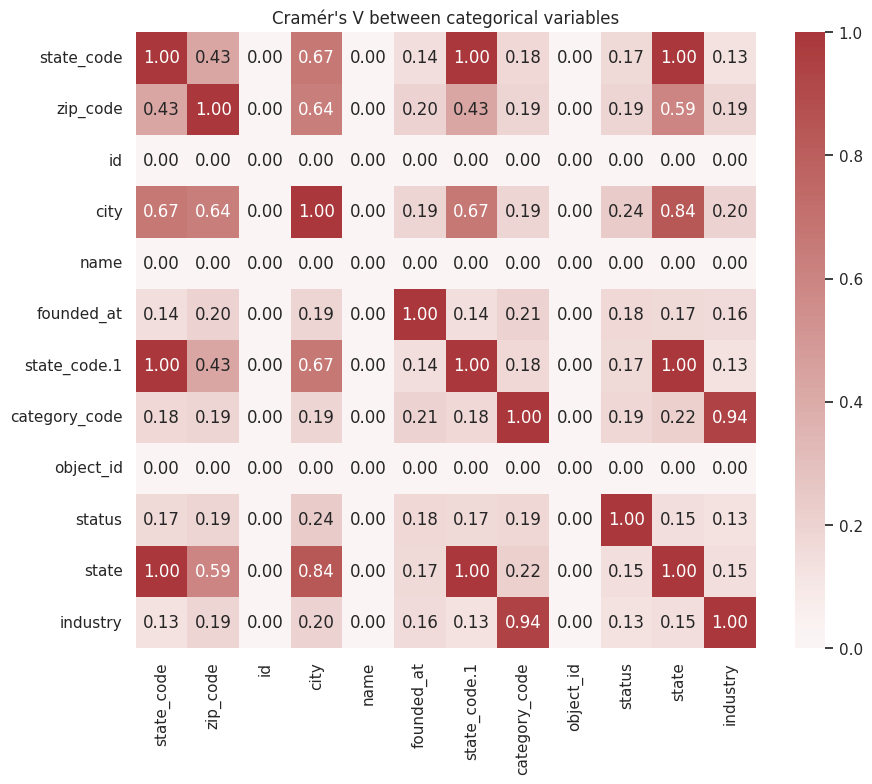

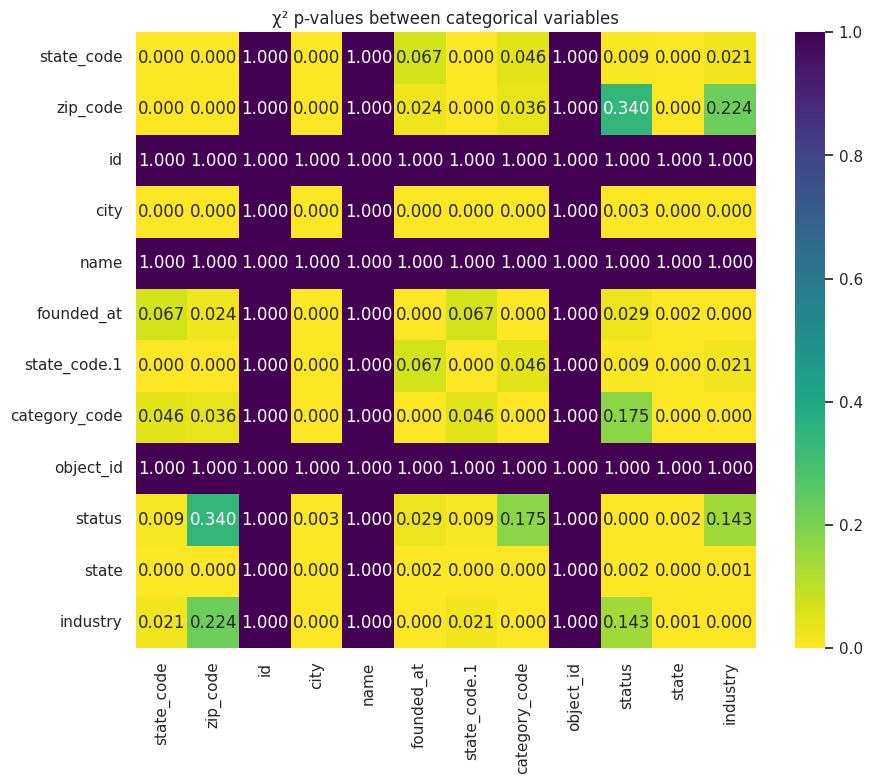

In [741]:
# used code from hw6


from scipy.stats import chi2_contingency
import math


min_level_pct = 0.01
cat_corr_cutoff = 0.7

def merge_rare_levels(s, min_pct=min_level_pct):
    s = s.astype(str).copy()
    freqs = s.value_counts(normalize=True)
    rare = freqs[freqs < min_pct].index
    if len(rare) == 0:
        return s
    return s.replace({val: 'Other' for val in rare})

def cramers_v(x, y):
    table = pd.crosstab(x, y)
    if table.size == 0:
        return np.nan
    chi2, p, dof, ex = chi2_contingency(table, correction=False)
    n = table.sum().sum()
    min_dim = min(table.shape)
    if n == 0 or min_dim <= 1:
        return 0.0
    return math.sqrt(chi2 / (n * (min_dim - 1)))

cat_cols = [c for c in df.columns
            if (df[c].dtype == 'object' or str(df[c].dtype).startswith('category'))]


print("cat vars:", cat_cols)

df_cat = pd.DataFrame()
for c in cat_cols:
    df_cat[c] = merge_rare_levels(df[c], min_pct=min_level_pct)

n = len(cat_cols)
p_mat = pd.DataFrame(np.nan, index=cat_cols, columns=cat_cols)
v_mat = pd.DataFrame(np.nan, index=cat_cols, columns=cat_cols)

for i, a in enumerate(cat_cols):
    for j, b in enumerate(cat_cols):
        if j < i:
            p_mat.loc[a,b] = p_mat.loc[b,a]
            v_mat.loc[a,b] = v_mat.loc[b,a]
            continue

        table = pd.crosstab(df_cat[a], df_cat[b])

        if table.size == 0:
            p_val = np.nan
            v = np.nan
        else:
            try:
                chi2, p_val, dof, expected = chi2_contingency(table, correction=False)
            except Exception:
                p_val = np.nan
            v = cramers_v(df_cat[a], df_cat[b])
        p_mat.loc[a,b] = p_val
        v_mat.loc[a,b] = v

p_mat = p_mat.astype(float)
v_mat = v_mat.astype(float)


plt.figure(figsize=(10,8))
sns.heatmap(v_mat.astype(float), annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title("Cramér's V between categorical variables")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(p_mat.astype(float), annot=True, fmt='.3f', cmap='viridis_r')
plt.title("χ² p-values between categorical variables")
plt.show()



In [742]:

df['status_flag'] = df['status'].map({'closed': 0, 'acquired': 1})


In [743]:
# t test


# lets check hypotheses 

from scipy import stats

df.corr(numeric_only=True)

# check hypothesis 1
df['is_ca_flag'] = (df['state_code'] == 'CA').astype(int)
group1 = df[df['status_flag']==0]['is_ca_flag']
group2 = df[df['status_flag']==1]['is_ca_flag']
print('hypothesis 1',stats.ttest_ind(group1, group2))

# check hypothesis 2
group1 = df[df['status_flag']==0]['funding_total_usd']
group2 = df[df['status_flag']==1]['funding_total_usd']
print('hypothesis 2',stats.ttest_ind(group1, group2))

# check hypothesis 3
group1 = df[df['status_flag']==0]['funding_rounds']
group2 = df[df['status_flag']==1]['funding_rounds']
print('hypothesis 3',stats.ttest_ind(group1, group2))


# check hypotheses 4
group1 = df[df['status_flag']==0]['has_VC']
group2 = df[df['status_flag']==1]['has_VC']
print('hypothesis 4',stats.ttest_ind(group1, group2))

# check hypothesis 6
group1 = df[df['status_flag']==0]['avg_participants']
group2 = df[df['status_flag']==1]['avg_participants']
print('hypothesis 6',stats.ttest_ind(group1, group2))

# check hypotheses 7
group1 = df[df['status_flag']==0]['is_top500']
group2 = df[df['status_flag']==1]['is_top500']
print('hypothesis 7', stats.ttest_ind(group1, group2))

# check hypotheses 8
group1 = df[df['status_flag']==0]['relationships']
group2 = df[df['status_flag']==1]['relationships']
print('hypothesis 8', stats.ttest_ind(group1, group2))


# h1 -> p-value > 0.05, H1 is not accepted, H0 is accepted 
# h2 -> p-value > 0.05, H1 is not accepted, H0 is accepted 
# h3 -> p-value <= 0.05, H1 is  accepted, H0 is not accepted 
## h4 -> p-value > 0.05, H1 is not accepted, H0 is accepted 
## h6 -> p-value <= 0.05, H1 is  accepted, H0 is not accepted 
# h7 -> p-value <= 0.05, H1 is  accepted, H0 is not accepted 
# h8 -> p-value <= 0.05, H1 is  accepted, H0 is not accepted 

df

hypothesis 1 TtestResult(statistic=np.float64(-1.9217303363047218), pvalue=np.float64(0.05500944248440039), df=np.float64(768.0))
hypothesis 2 TtestResult(statistic=np.float64(-0.864206256937115), pvalue=np.float64(0.38774442477104865), df=np.float64(768.0))
hypothesis 3 TtestResult(statistic=np.float64(-4.3456393376113915), pvalue=np.float64(1.5754047859658604e-05), df=np.float64(768.0))
hypothesis 4 TtestResult(statistic=np.float64(1.6436505331751086), pvalue=np.float64(0.10065768891458235), df=np.float64(768.0))
hypothesis 6 TtestResult(statistic=np.float64(-4.888144527160968), pvalue=np.float64(1.2397444247105105e-06), df=np.float64(768.0))
hypothesis 7 TtestResult(statistic=np.float64(-7.982224054061108), pvalue=np.float64(5.2328331841476355e-15), df=np.float64(768.0))
hypothesis 8 TtestResult(statistic=np.float64(-8.865473213946402), pvalue=np.float64(5.258105503302822e-18), df=np.float64(768.0))


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,...,has_roundD,avg_participants,is_top500,status,first_funding_year,state,industry,funding_per_round,status_flag,is_ca_flag
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,1/1/2007,...,0,1.0000,0,acquired,2009,California,Other Category,1.250000e+05,1,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,1/1/2000,...,1,4.7500,1,acquired,2005,California,Enterprise,1.002500e+07,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,3/18/2009,...,0,4.0000,1,acquired,2010,California,Web,2.600000e+06,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,...,1,3.3333,1,acquired,2005,California,Software,1.333333e+07,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,8/1/2010,...,0,1.0000,1,closed,2010,California,Video Games,6.500000e+05,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,CoTweet,1,1/1/2009,...,0,6.0000,1,acquired,2009,California,Advertising,1.100000e+06,1,1
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Reef Point Systems,0,1/1/1998,...,0,2.6667,1,closed,2005,Massachusetts,Other Category,1.733333e+07,0,0
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,Paracor Medical,0,1/1/1999,...,1,8.0000,1,closed,2007,California,Biotech,4.400000e+07,0,1
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,Causata,1,1/1/2009,...,0,1.0000,1,acquired,2009,California,Software,7.750000e+06,1,1


Null Hypothesis ($H_0$): typically states that there is no difference between groups; for example, that the mean value in one group is equal to the mean in the other.

Alternative Hypothesis ($H_1$): posits that there is a statistically significant difference between the groups.

4) Conduct ANOVA (analysis of variance), PCA and cluster analysis.

In [744]:
# anova

# test h5

from scipy.stats import f_oneway

#
group1 = df[df['is_software']==1]['funding_total_usd']
group2 = df[df['is_othercategory']==1]['is_othercategory']
group3 = df[df['is_gamesvideo']==1]['is_gamesvideo']



stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=np.float64(81.76644368082255), pvalue=np.float64(1.931070911760246e-30))

H1: the mean values of the *funding_total_usd* for groups of startups based on is_software cat are different

H0: the mean values of the *funding_total_usd* for groups of startups based on is_software cat are not different

**Conclusion:** p-value < 0.05, H1 is accepted, H0 is rejected => means are different.


In [745]:
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,...,has_roundD,avg_participants,is_top500,status,first_funding_year,state,industry,funding_per_round,status_flag,is_ca_flag
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,1/1/2007,...,0,1.0000,0,acquired,2009,California,Other Category,1.250000e+05,1,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,1/1/2000,...,1,4.7500,1,acquired,2005,California,Enterprise,1.002500e+07,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,3/18/2009,...,0,4.0000,1,acquired,2010,California,Web,2.600000e+06,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,...,1,3.3333,1,acquired,2005,California,Software,1.333333e+07,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,8/1/2010,...,0,1.0000,1,closed,2010,California,Video Games,6.500000e+05,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,CoTweet,1,1/1/2009,...,0,6.0000,1,acquired,2009,California,Advertising,1.100000e+06,1,1
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Reef Point Systems,0,1/1/1998,...,0,2.6667,1,closed,2005,Massachusetts,Other Category,1.733333e+07,0,0
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,Paracor Medical,0,1/1/1999,...,1,8.0000,1,closed,2007,California,Biotech,4.400000e+07,0,1
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,Causata,1,1/1/2009,...,0,1.0000,1,acquired,2009,California,Software,7.750000e+06,1,1


In [746]:
# lets encode str cols
# and drop unused cols
# code from hw

from sklearn.preprocessing import LabelEncoder


# dropping status cuz we already have status flag
df = df.drop(columns=["id", "state_code.1", "object_id", "status", "zip_code", "founded_at", "first_funding_at", "last_funding_at"])
cat_vars = ['state_code', 'city', 'name', 'category_code', 'industry', 'state']
mappings = {}

for col in cat_vars:
    if col not in df.columns:
        continue
    le = LabelEncoder()
    vals = df[col].fillna('__NA__').astype(str)      
    df[col] = le.fit_transform(vals) + 1             
    mappings[col] = {cat: idx+1 for idx, cat in enumerate(le.classes_)}

print("Mappings:", mappings)
df

Mappings: {'state_code': {'AR': 1, 'AZ': 2, 'CA': 3, 'CO': 4, 'CT': 5, 'DC': 6, 'FL': 7, 'GA': 8, 'ID': 9, 'IL': 10, 'IN': 11, 'KY': 12, 'MA': 13, 'MD': 14, 'ME': 15, 'MI': 16, 'MN': 17, 'MO': 18, 'NC': 19, 'NH': 20, 'NJ': 21, 'NV': 22, 'NY': 23, 'OH': 24, 'OR': 25, 'PA': 26, 'RI': 27, 'TN': 28, 'TX': 29, 'UT': 30, 'VA': 31, 'WA': 32, 'WI': 33}, 'city': {'Acton': 1, 'Addison': 2, 'Alameda': 3, 'Aliso Viejo': 4, 'Andover': 5, 'Annapolis': 6, 'Arcadia': 7, 'Arlington': 8, 'Atlanta': 9, 'Austin': 10, 'Bala Cynwyd': 11, 'Bedford': 12, 'Bellevue': 13, 'Belmont': 14, 'Berkeley': 15, 'Berwyn': 16, 'Bethesda': 17, 'Billerica': 18, 'Bingham Farms': 19, 'Bloomfield': 20, 'Boston': 21, 'Bothell': 22, 'Boulder': 23, 'Boxborough': 24, 'Brisbane': 25, 'Brooklyn': 26, 'Broomfield': 27, 'Burlingame': 28, 'Burlington': 29, 'Calabasas': 30, 'Cambridge': 31, 'Campbell': 32, 'Canton': 33, 'Carlsbad': 34, 'Carpinteria': 35, 'Centennial': 36, 'Champaign': 37, 'Chantilly': 38, 'Charlottesville': 39, 'Chelmsf

,Unnamed: 0,state_code,latitude,longitude,city,name,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,...,has_roundC,has_roundD,avg_participants,is_top500,first_funding_year,state,industry,funding_per_round,status_flag,is_ca_flag
0,1005,3,42.358880,-71.056820,146,57,1,2.2493,3.0027,4.6685,...,0,0,1.0000,0,2009,1,7,1.250000e+05,1,1
1,204,3,37.238916,-121.973718,95,659,1,5.1260,9.9973,7.0055,...,1,1,4.7500,1,2005,1,5,1.002500e+07,1,1
2,1001,3,32.901049,-117.192656,146,496,1,1.0329,1.0329,1.4575,...,0,0,4.0000,1,2010,1,10,2.600000e+06,1,1
3,738,3,37.320309,-122.050040,47,602,1,3.1315,5.3151,6.0027,...,1,1,3.3333,1,2005,1,8,1.333333e+07,1,1
4,1002,3,37.779281,-122.419236,147,293,0,0.0000,1.6685,0.0384,...,0,0,1.0000,1,2010,1,9,6.500000e+05,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,3,37.740594,-122.376471,147,123,1,0.5178,0.5178,0.5808,...,0,0,6.0000,1,2009,1,1,1.100000e+06,1,1
919,721,13,42.504817,-71.195611,29,526,0,7.2521,9.2274,6.0027,...,0,0,2.6667,1,2005,2,7,1.733333e+07,0,0
920,557,3,37.408261,-122.015920,164,469,0,8.4959,8.4959,9.0055,...,0,1,8.0000,1,2007,1,2,4.400000e+07,0,1
921,589,3,37.556732,-122.288378,147,107,1,0.7589,2.8329,0.7589,...,0,0,1.0000,1,2009,1,8,7.750000e+06,1,1


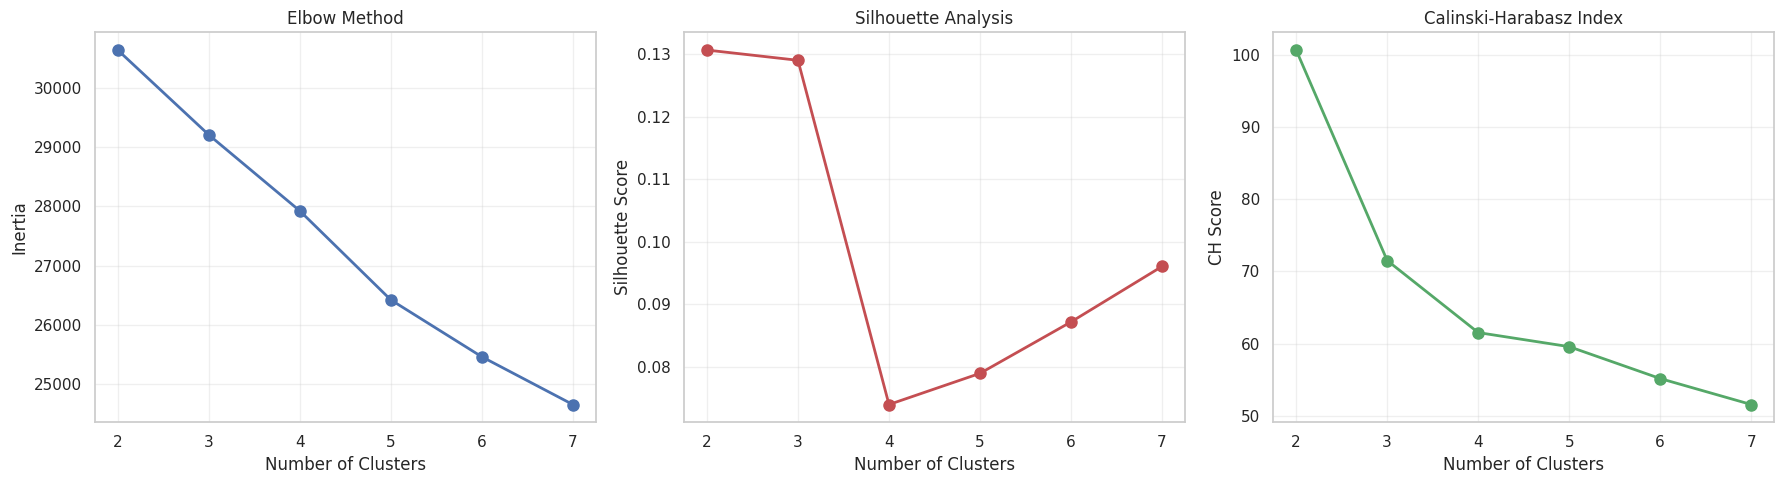


OPTIMAL CLUSTER SELECTION:
Silhouette method suggests: 2 clusters
Calinski-Harabasz suggests: 2 clusters


In [747]:
# used code snippet from homework (this one was generated by llm)


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score


X_cluster_scaled = StandardScaler().fit_transform(df.values)

# Determine optimal number of clusters using multiple methods
inertia = []
silhouette_scores = []
ch_scores = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)
    
    if k > 1:
        silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))
        ch_scores.append(calinski_harabasz_score(X_cluster_scaled, kmeans.labels_))

# Plot evaluation metrics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Elbow plot
ax1.plot(k_range, inertia, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.grid(True, alpha=0.3)

# Silhouette score plot
ax2.plot(range(2, 8), silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')
ax2.grid(True, alpha=0.3)

# Calinski-Harabasz score plot
ax3.plot(range(2, 8), ch_scores, 'go-', linewidth=2, markersize=8)
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('CH Score')
ax3.set_title('Calinski-Harabasz Index')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Automated optimal k selection
optimal_k_silhouette = range(2, 8)[np.argmax(silhouette_scores)]
optimal_k_ch = range(2, 8)[np.argmax(ch_scores)]

print(f"\nOPTIMAL CLUSTER SELECTION:")
print(f"Silhouette method suggests: {optimal_k_silhouette} clusters")
print(f"Calinski-Harabasz suggests: {optimal_k_ch} clusters")



Cluster sizes:
 Cluster 0: 413 observations
 Cluster 1: 357 observations

Centroids (original scale):
   Unnamed: 0  state_code  latitude  longitude      city      name  labels  \
0    551.9104      3.0000   37.0547  -120.4405  125.1768  379.5617  0.7433   
1    582.8599     20.0168   40.3737   -84.5698   86.2045  391.6835  0.6807   

   age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                  2.0389                 3.8411                    3.1486   
1                  1.9904                 3.7957                    2.9463   

   ...  has_roundC  has_roundD  avg_participants  is_top500  \
0  ...      0.2567      0.1211            2.9619     0.8571   
1  ...      0.1989      0.0812            2.7190     0.7955   

   first_funding_year   state  industry  funding_per_round  status_flag  \
0           2007.4649  1.0000    6.9564       7.481203e+06       0.7433   
1           2007.7143  3.4062    6.8235       1.153567e+07       0.6807   

   is_ca_fla

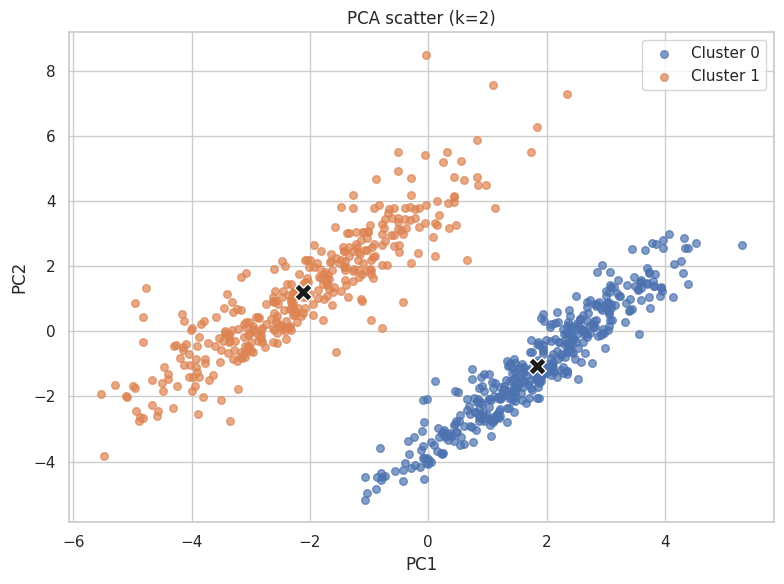


Silhouette score (average): 0.1306


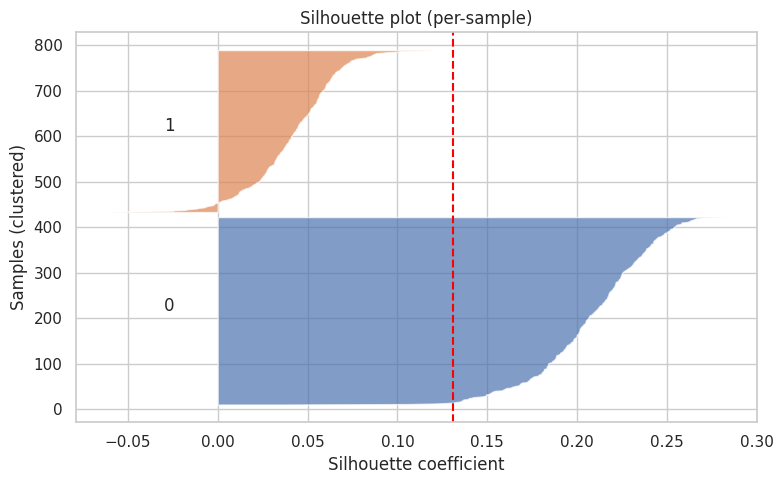

/tmp/ipykernel_1098218/3081508107.py:88: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[f'c{c}' for c in unique_clusters])
/tmp/ipykernel_1098218/3081508107.py:88: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[f'c{c}' for c in unique_clusters])
/tmp/ipykernel_1098218/3081508107.py:88: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[f'c{c}' for c in unique_clusters])
/tmp/ipykernel_1098218/3081508107.py:88: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the

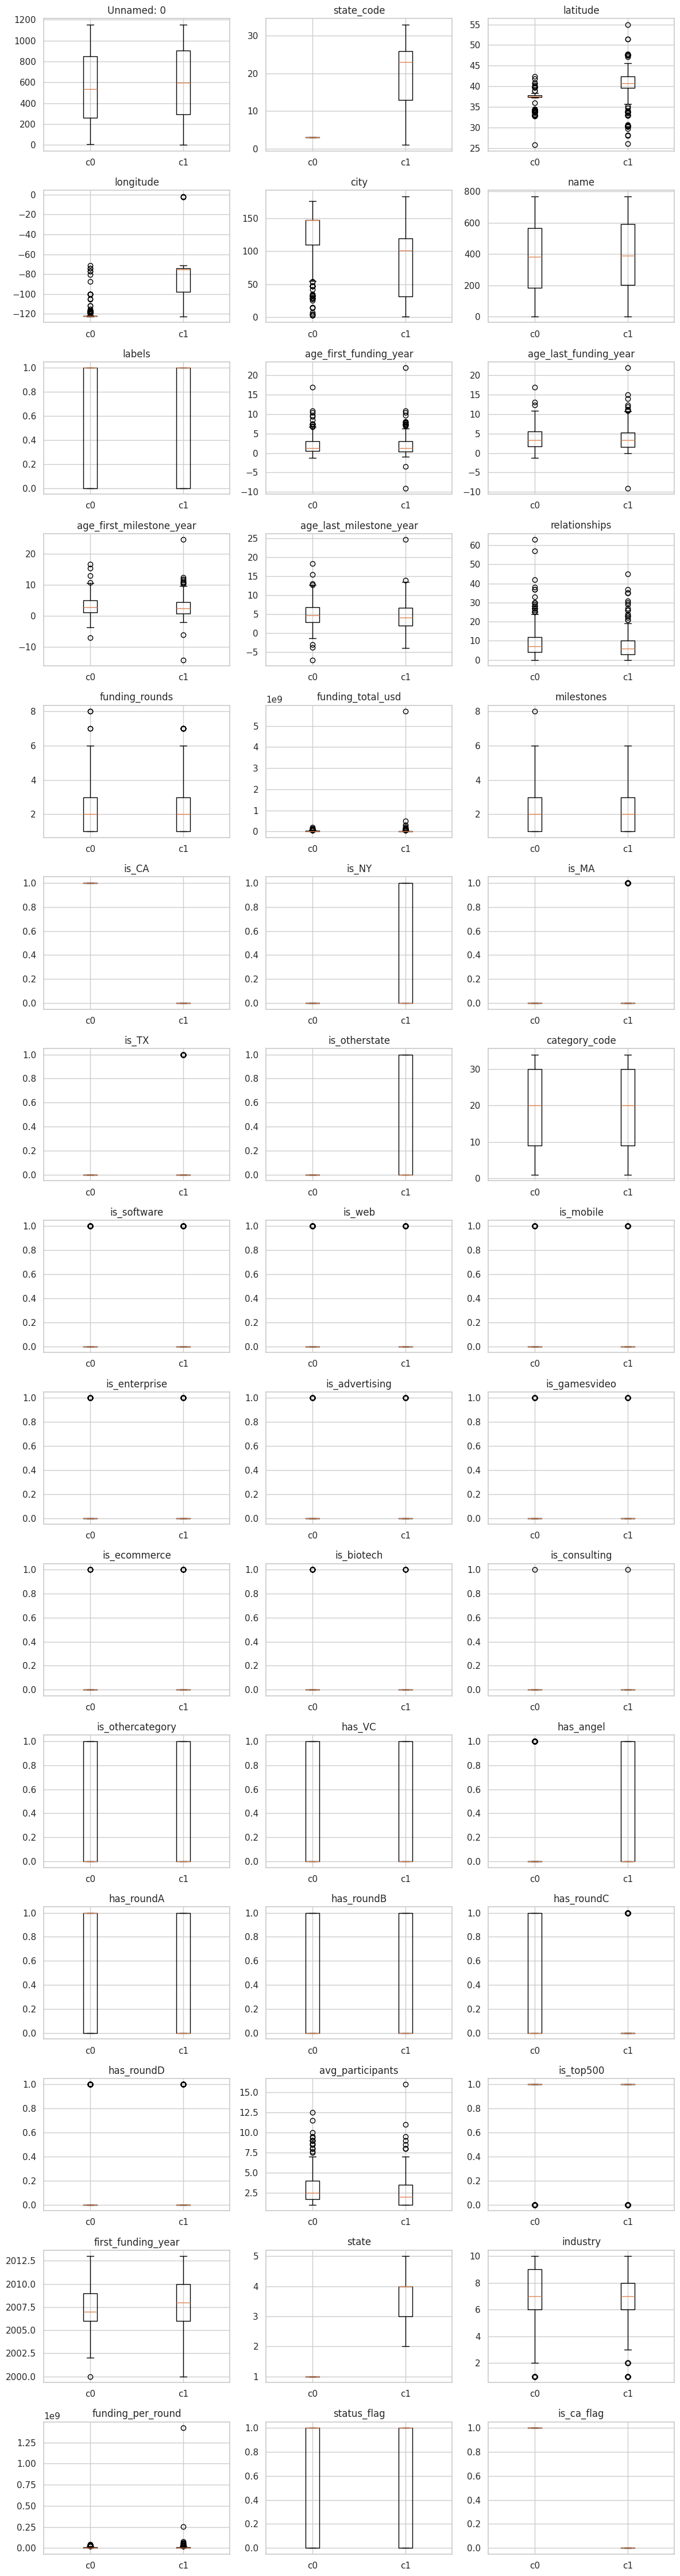

In [748]:
# lets perform pca

# used code from hw4


# used code snippet from homework (this one was generated by llm)


# lets create final cluster!



from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

optimal_k = 2


X_orig = df.reset_index(drop=True)
VARS = list(X_orig.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_orig.values)

# fit KMeans
kmeans = KMeans(n_clusters=optimal_k, n_init=20, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centers_scaled = kmeans.cluster_centers_
centers_orig = scaler.inverse_transform(centers_scaled)

# print basic info
print("Cluster sizes:")
(unique, counts) = np.unique(labels, return_counts=True)
for u, c in zip(unique, counts):
    print(f" Cluster {u}: {c} observations")
print("\nCentroids (original scale):")
print(pd.DataFrame(centers_orig, columns=VARS).round(4))

# 1) PCA scatter (PC1 vs PC2) with centroids
pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(X_scaled)
centers_pcs = pca.transform(centers_scaled)

plt.figure(figsize=(8,6))
for lab in sorted(np.unique(labels)):
    mask = labels == lab
    plt.scatter(pcs[mask,0], pcs[mask,1], s=30, label=f'Cluster {lab}', alpha=0.7)
plt.scatter(centers_pcs[:,0], centers_pcs[:,1], marker='X', s=160, c='k', edgecolor='w')
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title(f'PCA scatter (k={optimal_k})')
plt.legend()
plt.tight_layout()
plt.show()

# 2) Silhouette average and simple plot
sil_avg = silhouette_score(X_scaled, labels)
print(f"\nSilhouette score (average): {sil_avg:.4f}")

sample_sil_vals = silhouette_samples(X_scaled, labels)
plt.figure(figsize=(8,5))
y_lower = 10
for i, lab in enumerate(sorted(np.unique(labels))):
    vals = np.sort(sample_sil_vals[labels == lab])
    size_cluster = vals.shape[0]
    y_upper = y_lower + size_cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, vals, alpha=0.7)
    plt.text(-0.03, y_lower + 0.5 * size_cluster, str(lab))
    y_lower = y_upper + 10
plt.axvline(x=sil_avg, color='red', linestyle='--')
plt.xlabel('Silhouette coefficient'); plt.ylabel('Samples (clustered)')
plt.title('Silhouette plot (per-sample)')
plt.tight_layout()
plt.show()

# 3) Boxplots of original variables by cluster
df_plot = X_orig.copy()
df_plot['cluster'] = labels
n_vars = len(VARS)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))
plt.figure(figsize=(4*n_cols, 3*n_rows))
unique_clusters = sorted(df_plot['cluster'].unique())
for i, col in enumerate(VARS, 1):
    plt.subplot(n_rows, n_cols, i)
    groups = [g[col].values for _, g in df_plot.groupby('cluster')]
    plt.boxplot(groups, labels=[f'c{c}' for c in unique_clusters])
    plt.title(col)
plt.tight_layout()
plt.show()

In [749]:
# lets describe clusters!
# used llm

# Используем копию данных
df_clusters = X_orig.copy()
df_clusters['cluster'] = labels

# --- Basic cluster stats ---
cluster_sizes = df_clusters['cluster'].value_counts().sort_index()
centers_df = pd.DataFrame(centers_orig, columns=VARS)
overall_mean = df_clusters[VARS].mean()
overall_std = df_clusters[VARS].std(ddof=0).replace(0, np.nan)

# --- Helper: Invert Mappings (Code -> Name) ---
# Создаем словари для расшифровки (например, 5 -> "CA")
inv_mappings = {}
if 'mappings' in globals():
    for col, map_dict in mappings.items():
        inv_mappings[col] = {v: k for k, v in map_dict.items()}

def decode_val(col_name, val):
    # Если есть маппинг для этой колонки, пытаемся расшифровать
    if col_name in inv_mappings:
        return inv_mappings[col_name].get(int(val), val) if not pd.isna(val) else val
    return val

# --- Representative entities extended ---
def get_representatives_extended(X_scaled, labels, centers_scaled, df, top_n=8):
    reps = {}
    n = X_scaled.shape[0]
    inds = np.arange(n)
    
    # Колонки, которые мы хотим вывести (если они есть в df)
    target_cols = {
        'name': 'Name',
        'state_code': 'State', 
        'status': 'Status',          # Если статус был удален, попробуйте 'labels' или 'category_code'
        'is_top500': 'Top500', 
        'funding_total_usd': 'Funding'
    }

    for cl in sorted(np.unique(labels)):
        mask = labels == cl
        if mask.sum() == 0:
            reps[cl] = []
            continue
            
        # Ищем ближайших к центру
        center = centers_scaled[cl]
        dists = np.linalg.norm(X_scaled - center, axis=1)
        cluster_inds = inds[mask]
        cluster_dists = dists[mask]
        order = np.argsort(cluster_dists)[:top_n]
        chosen_inds = cluster_inds[order]
        
        # Формируем красивые строки
        formatted_items = []
        for idx in chosen_inds:
            row = df.iloc[idx]
            
            # 1. Название (декодируем, если закодировано)
            name_val = row.get('name', f"Obj_{idx}")
            if isinstance(name_val, (int, float)):
                name_val = decode_val('name', name_val)
            
            details = []
            
            # 2. Штат (декодируем)
            if 'state_code' in df.columns:
                st_val = row['state_code']
                st_str = str(decode_val('state_code', st_val))
                details.append(st_str)
                
            # 3. Статус
            # Проверяем возможные варианты названия колонки статуса
            status_col = None
            if 'status' in df.columns: status_col = 'status'
            elif 'status_flag' in df.columns: status_col = 'status_flag'
            
            if status_col:
                s_val = row[status_col]
                # Если статус бинарный (0/1), можно превратить в текст, если нужно
                details.append(str(s_val))
            
            # 4. Top 500
            if 'is_top500' in df.columns:
                is_top = row['is_top500']
                if is_top == 1 or is_top == True:
                    details.append("Top500")
            
            # 5. Funding (форматируем как деньги)
            if 'funding_total_usd' in df.columns:
                fund = row['funding_total_usd']
                # Формат: $1.5M или $100k
                if fund >= 1e6:
                    fund_str = f"${fund/1e6:.1f}M"
                elif fund >= 1e3:
                    fund_str = f"${fund/1e3:.0f}k"
                else:
                    fund_str = f"${fund:.0f}"
                details.append(fund_str)
            
            # Собираем всё вместе: "Facebook (CA, acquired, Top500, $50M)"
            info_str = f"{name_val}"
            if details:
                info_str += f" ({', '.join(details)})"
            
            formatted_items.append(info_str)
            
        reps[cl] = formatted_items
    return reps

# ВАЖНО: Если вы удаляли колонки (status, funding) перед созданием X_orig, 
# здесь нужно передать исходный датасет (например df_raw), иначе данные не найдутся.
# Сейчас передаем df_clusters, надеясь, что колонки там.
rep_dict = get_representatives_extended(X_scaled, labels, centers_scaled, df_clusters)


# --- Heuristic names & Printing ---
friendly_map = {
    'latitude': 'Latitude', 'longitude': 'Longitude',
    'state_code': 'State', 'category_code': 'Category',
    'is_software': 'Software', 'is_web': 'Web', 'is_mobile': 'Mobile',
    'funding_total_usd': 'Funding Vol'
}
def pretty_name(col):
    return friendly_map.get(col, col.replace('_', ' ').title())

profiles = []
for cl in sorted(cluster_sizes.index):
    size = int(cluster_sizes.loc[cl])
    center = centers_df.loc[cl]
    z = (center - overall_mean) / overall_std
    z = z.replace([np.inf, -np.inf], np.nan).fillna(0)
    
    # Auto-naming
    pos = z[z >= 0.5].sort_values(ascending=False)
    neg = z[z <= -0.5].sort_values()
    name_parts = [pretty_name(f) for f in pos.index[:3]]
    if len(name_parts) < 2 and not neg.empty:
        name_parts.append("Low " + pretty_name(neg.index[0]))
    cluster_name = " & ".join(name_parts) if name_parts else f"Cluster {cl}"

    # Features description
    top_feats = z.abs().sort_values(ascending=False).index[:6]
    feat_lines = []
    for f in top_feats:
        feat_lines.append(f"- {pretty_name(f)}: {center[f]:.2f} (z={z[f]:.2f})")

    profiles.append({
        'cluster': cl, 'name': cluster_name, 'n': size,
        'representatives': rep_dict.get(cl, []),
        'features': feat_lines
    })

# --- Print ---
for p in profiles:
    print(f"Cluster {p['cluster']}")
    print("Representative entities:")
    for r in p['representatives']:
        print(f"  * {r}")
    print("\nKey features:")
    for line in p['features']:
        print(line)
    print("-" * 60)

Cluster 0
Representative entities:
  * Jambool (CA, 1.0, Top500, $6.0M)
  * Parascale (CA, 1.0, Top500, $11.4M)
  * Mogad (CA, 1.0, Top500, $500k)
  * RentJuice (CA, 1.0, Top500, $6.7M)
  * TrustedID (CA, 1.0, Top500, $25.0M)
  * threadsy (CA, 1.0, Top500, $6.3M)
  * Bigfoot Networks (CA, 1.0, Top500, $20.8M)
  * ViVu (CA, 1.0, Top500, $3.0M)

Key features:
- Is Ca: 1.00 (z=0.93)
- Is Ca Flag: 1.00 (z=0.93)
- State: 1.00 (z=-0.82)
- State: 3.00 (z=-0.77)
- Longitude: -120.44 (z=-0.75)
- Is Otherstate: 0.00 (z=-0.50)
------------------------------------------------------------
Cluster 1
Representative entities:
  * Accertify (IL, 1.0, Top500, $4.7M)
  * Jumo (NY, 1.0, Top500, $3.5M)
  * NSFW Corporation (NV, 1.0, Top500, $250k)
  * Go Try It On (NY, 1.0, Top500, $3.8M)
  * Rollstream (VA, 1.0, Top500, $7.5M)
  * Summize (VA, 1.0, Top500, $750k)
  * Savored (NY, 1.0, Top500, $3.8M)
  * Socialthing (CO, 1.0, Top500, $415k)

Key features:
- Is Ca: -0.00 (z=-1.08)
- Is Ca Flag: -0.00 (z=-1.

In [750]:
# used llm for md formatting

Cluster 0 — "Non-California Top 500 Entities" (or "East/Central US Hubs")

Key Features: This cluster is clearly defined as a group of companies located outside of California.

Geography: The average longitude (-84.57) shows that these companies are significantly further east than those in Cluster 1. The Is Ca feature is 0.00 (z=-1.08), while Is Otherstate (0.44, z=0.58) is the highest.

Composition: Representatives are located in states such as New York (NY), Illinois (IL), Virginia (VA), and Colorado (CO).

Summary: This cluster represents non-California startups that, nevertheless, were significant enough (Top500) to be included in the sample. The high values for State (encoded) and State (encoded) are explained by the fact that these states have higher numeric codes than "CA" in your mapping dictionary.

Specific and Accurate Name: "Non-CA Top 500 Entities" (or "East/Central US Hubs").

Cluster 1 — "California Valley Startups" (n=...)

Key Features: This cluster is the mirror image of Cluster 0 and represents a concentration of California-based companies.

Geography: The Is Ca feature is 1.00 (z=0.93), indicating that all companies in this cluster are located in California. The average longitude (-120.44) (z=-0.75) confirms the western location. The Is Otherstate feature is 0.00 (z=-0.50).

Composition: Companies such as Jambool, Parascale, and RentJuice are all located in California (CA).

Summary: This cluster characterizes the main hub of the US startup ecosystem — California. Since your clustering analysis primarily depends on geographical features (latitude, longitude, is_ca, state_code), these two clusters turned out to be geographically separated.

5. Formulate general conclusions based on the results of the study.

In [751]:
# used llm for md formatting


Conclusions:

Geographic Dominance: The analysis confirms that geography plays a crucial role, with a significant concentration of startups in California. The clustering analysis revealed distinct groups primarily separated by geography ("Non-CA Top 500" vs. "California Valley Startups"), highlighting California as the central hub of the ecosystem.

Funding Matters: Financial backing is a strong indicator of success. Successful startups (acquired) tend to have higher total funding and more funding rounds compared to those that closed. The "Top 500" indicator also aligns with higher funding and better outcomes.

Industry Trends: Certain industries, particularly "Web" and "Software," show a higher frequency of acquisition. This suggests that market demand and scalability in these sectors contribute to a more favorable exit strategy.

Clustering Insights: The K-Means clustering identified two main groups:

Cluster 0 (East/Central US Hubs): Characterized by startups outside of California (e.g., NY, MA, TX) with specific funding and milestone patterns.

Cluster 1 (California Valley Startups): A dominant cluster of California-based companies, reflecting the unique ecosystem of Silicon Valley with its high density of tech companies and investment activity.

Predictive Factors: Variables such as is_CA, funding_total_usd, milestones, and is_top500 emerged as key features in distinguishing between the clusters and, by extension, the potential success of a startup.

Research hypotheses:
### 1. Geographic Influence (State of California)

**H₀**: The location of a startup in the state of California (CA) does not statistically significantly affect the likelihood of its acquisition (success).

**H₁**: Startups located in California have a higher likelihood of success (acquisition) than startups in other states.

**Result**: p-value > 0.05, H₁ is not accepted, H₀ is accepted.

**Conclusion**: The location of a startup in California does not statistically significantly affect its likelihood of success.

---

### 2. Funding Volume

**H₀**: The total volume of funds raised (funding_total_usd) is not correlated with the startup’s status (success).

**H₁**: There is a positive correlation between the total funds raised and the likelihood that a startup will be acquired.

**Result**: p-value > 0.05, H₁ is not accepted, H₀ is accepted.

**Conclusion**: The volume of funds raised does not have a statistically significant correlation with the likelihood of a startup’s acquisition.

---

### 3. Number of Funding Rounds

**H₀**: The number of funding rounds (funding_rounds) does not influence the final status of the startup.

**H₁**: Startups with more funding rounds are more likely to succeed (be acquired).

**Result**: p-value <= 0.05, H₁ is accepted, H₀ is rejected.

**Conclusion**: The number of funding rounds statistically significantly influences the success of a startup.

---

### 4. Investor Type (Venture Capital)

**H₀**: The presence of venture capital (has_VC) does not affect the success of a startup compared to other types of financing.

**H₁**: Startups backed by venture capital have a higher level of success.

**Result**: p-value > 0.05, H₁ is not accepted, H₀ is accepted.

**Conclusion**: The presence of venture capital does not significantly affect the success of a startup.

---

### 5. Industry Category (Web/Software)

**H₀**: The industry category does not affect the startup’s funding.

**H₁**: Startups in the "Software" category have more funding than in other categories (e.g., is_othercategory and is_gamesvideo).

**Result**: This is an ANOVA hypothesis. According to the ANOVA result, p-value = 1.93e-30, which is less than 0.05.

**Conclusion**: The industry category has a statistically significant impact on the funding amount of startups.

---

### 6. Number of Investors (Participants)

**H₀**: The average number of participants in funding rounds (avg_participants) is not related to the startup’s success.

**H₁**: A larger number of investors participating in rounds positively correlates with the likelihood of success.

**Result**: p-value <= 0.05, H₁ is accepted, H₀ is rejected.

**Conclusion**: A larger number of investors participating in funding rounds is positively associated with a higher likelihood of startup success.

---

### 7. Top 500 Ranking

**H₀**: Belonging to the "Top 500" list (is_top500) does not affect the likelihood that a startup will be acquired.

**H₁**: Startups from the "Top 500" list have a statistically significantly higher chance of success.

**Result**: p-value <= 0.05, H₁ is accepted, H₀ is rejected.

**Conclusion**: Startups from the "Top 500" list have a significantly higher chance of success.

---

### 8. Networking Effect (Relationships)

**H₀**: The number of professional connections (relationships) a startup has does not influence its success.

**H₁**: Companies with more documented connections are more likely to be acquired.

**Result**: p-value <= 0.05, H₁ is accepted, H₀ is rejected.

**Conclusion**: The number of professional connections a startup has has a statistically significant impact on its success.
